# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
import warnings
warnings.simplefilter('ignore')

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('../../yandex-praktikum-sources/real_estate_data.csv', sep="\t")

In [3]:
# просмотр общей информации о данных
display(df.head(10))
display(df.info())
display(df.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20 13000000.00      108.00  2019-03-07T00:00:00      3   
1             7  3350000.00       40.40  2018-12-04T00:00:00      1   
2            10  5196000.00       56.00  2015-08-20T00:00:00      2   
3             0 64900000.00      159.00  2015-07-24T00:00:00      3   
4             2 10000000.00      100.00  2018-06-19T00:00:00      2   
5            10  2890000.00       30.40  2018-09-10T00:00:00      1   
6             6  3700000.00       37.30  2017-11-02T00:00:00      1   
7             5  7915000.00       71.60  2019-04-18T00:00:00      2   
8            20  2900000.00       33.16  2018-05-23T00:00:00      1   
9            18  5400000.00       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8          NaN   False   
1             NaN         11.00        18.60      1          NaN   False   
2             NaN          5.00        34.30      4          NaN   False   
3             NaN         14.00          NaN      9          NaN   False   
4            3.03         14.00        32.00     13          NaN   False   
5             NaN         12.00        14.40      5          NaN   False   
6             NaN         26.00        10.60      6          NaN   False   
7             NaN         24.00          NaN     22          NaN   False   
8             NaN         27.00        15.43     26          NaN   False   
9            2.50          9.00        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00     2.00             посёлок Шушары   
2      False          8.30     0.00            Санкт-Петербург   
3      False           NaN     0.00            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40     1.00          посёлок Парголово   
7      False         18.90     2.00            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50     2.00            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0          18863.00             16028.00              1.00         482.00   
1          12817.00             18603.00              0.00            NaN   
2          21741.00             13933.00              1.00          90.00   
3          28098.00              6800.00              2.00          84.00   
4          31856.00              8098.00              2.00         112.00   
5               NaN                  NaN               NaN            NaN   
6          52996.00             19143.00              0.00            NaN   
7          23982.00             11634.00              0.00            NaN   
8               NaN                  NaN               NaN            NaN   
9          50898.00             15008.00              0.00            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0              2.00         755.00              NaN  
1              0.00            NaN            81.00  
2              2.00         574.00           558.00  
3              3.00         234.00           424.00  
4              1.00          48.00           121.00  
5               NaN            NaN            55.00  
6              0.00            NaN           155.00  
7              0.00            NaN              NaN  
8               NaN            NaN           189.00  
9              0.00            NaN           289.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

count       mean         std      min         5%  \
total_images        23699.00       9.86        5.68     0.00       1.00   
last_price          23699.00 6541548.77 10887013.27 12190.00 1870000.00   
total_area          23699.00      60.35       35.65    12.00      31.00   
rooms               23699.00       2.07        1.08     0.00       1.00   
ceiling_height      14504.00       2.77        1.26     1.00       2.50   
floors_total        23613.00      10.67        6.60     1.00       4.00   
living_area         21796.00      34.46       22.03     2.00      15.20   
floor               23699.00       5.89        4.89     1.00       1.00   
kitchen_area        21421.00      10.57        5.91     1.30       5.50   
balcony             12180.00       1.15        1.07     0.00       0.00   
airports_nearest    18157.00   28793.67    12630.88     0.00   11557.40   
cityCenters_nearest 18180.00   14191.28     8608.39   181.00    3541.00   
parks_around3000    18181.00       0.61        0.80     0.00       0.00   
parks_nearest        8079.00     490.80      342.32     1.00      95.90   
ponds_around3000    18181.00       0.77        0.94     0.00       0.00   
ponds_nearest        9110.00     517.98      277.72    13.00      93.00   
days_exposition     20518.00     180.89      219.73     1.00       9.00   

                           25%        50%        75%         95%         99%  \
total_images              6.00       9.00      14.00       20.00       20.00   
last_price          3400000.00 4650000.00 6800000.00 15300000.00 36000000.00   
total_area               40.00      52.00      69.90      116.00      197.21   
rooms                     1.00       2.00       3.00        4.00        5.00   
ceiling_height            2.52       2.65       2.80        3.30        3.83   
floors_total              5.00       9.00      16.00       25.00       26.00   
living_area              18.60      30.00      42.30       69.00      120.00   
floor                     2.00       4.00       8.00       16.00       23.00   
kitchen_area              7.00       9.10      12.00       20.00       35.09   
balcony                   0.00       1.00       2.00        2.00        5.00   
airports_nearest      18585.00   26726.00   37273.00    51340.00    58544.12   
cityCenters_nearest    9238.00   13098.50   16293.00    31671.60    50064.63   
parks_around3000          0.00       0.00       1.00        2.00        3.00   
parks_nearest           288.00     455.00     612.00      968.00     2102.00   
ponds_around3000          0.00       1.00       1.00        3.00        3.00   
ponds_nearest           294.00     502.00     729.00      976.55     1159.00   
days_exposition          45.00      95.00     232.00      647.00     1068.66   

                             max  
total_images               50.00  
last_price          763000000.00  
total_area                900.00  
rooms                      19.00  
ceiling_height            100.00  
floors_total               60.00  
living_area               409.70  
floor                      33.00  
kitchen_area              112.00  
balcony                     5.00  
airports_nearest        84869.00  
cityCenters_nearest     65968.00  
parks_around3000            3.00  
parks_nearest            3190.00  
ponds_around3000            3.00  
ponds_nearest            1344.00  
days_exposition          1580.00

In [4]:
df.duplicated().sum() # явных дубликатов в таблице нет

0

Файл содержит информацию по 23699 объектам недвижимости, каждый из которых описывается 22 признаками. 
Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В общей информации о данных можно увидеть первые проблемы и неудобства в данных. Посмотрим, что предстоит поправить.

### Предварительный анализ
1. Цена квартиры сохранена как число с плавающей точкой. Обычно цены квартир - достаточно большие числа, чаще всего кратные тысячам рублей. Проверим, что это так. 

In [5]:
print(f'{len(df.query("last_price % 1000 != 0")) / len(df) :.0%}') # сколько квартир имеют цену с рублями на конце

3%


Всего у 3% объектов цена не кратна одной тысяче рублей. При том, что 95% цен выше 1.87 млн рублей, кажется удобным пересчитать цены в тысячи рублей.

2. В дате размещения объявления сохранено еще и время, к тому же сам формат даты не дружелюбный. Для удобства оставим только дату, без часов, и заменим тип данных на временной.

3. У почти половины объектов нет информации о высоте потолка, а у некоторых объектов она равна 1 или даже 100. Эту информацию предоставляет пользователь, и, видимо, не все считают ее важной, и либо не указывают ее, либо указывают ошибочно. Посмотрим, сколько квартир имеют некорректную информацию об этом параметре. Будем считать достоверной высоту потолка от 2.3 до 6 метров.  

Информация о высоте потолка отсутствует у 9195 квартир
Информация не вызывает доверия у 45 квартир, встречаются такие значения:
25.0 2.0 32.0 8.0 27.0 24.0 26.0 1.2 8.3 2.2 14.0 1.75 20.0 2.25 22.6 27.5 10.3 1.0 100.0


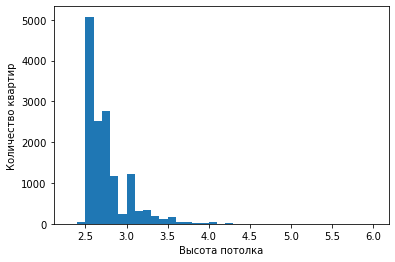

In [6]:
# считаем NaNы 
print(f'Информация о высоте потолка отсутствует у {df.ceiling_height.isna().sum()} квартир')
# считаем квартиры с недостоверной высотой
print(f'Информация не вызывает доверия у {len(df.query("ceiling_height < 2.3 or ceiling_height > 6"))} квартир, встречаются такие значения:')
print(*df.query("ceiling_height < 2.3 or ceiling_height > 6")['ceiling_height'].unique())
# посмотрим, как распределяются "достоверные" высоты
plt.hist(df[df['ceiling_height'].notna()].ceiling_height, bins=37, range=(2.3, 6))
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

Как и ожидалось, большинство квартир имеет высоту потолка от 2.5 до 3.5 метров. Судя по всему, иногда при ручном вводе данных случались ошибки и запятая оказывалась не там - так можно вернуть запятую на место и спасти информацию о нескольких объектах с высотой потолка якобы от 22 до 32 метров. Остальным добавим медианную высоту потолка вместо недостающей. В будущем стоит ограничить высоту потолка в квартирах 6 метрами при получении данных от пользователя. 

4. У 86 объектов нет информации об этажности здания. В будущем стоит рассмотреть возможность автоматизировать заполнение этого поля исходя из точного адреса, а для учебного проекта поступим так: назначим общее количество этажей исходя из градостроительных традиций - минимальное из 5, 9, 16 или 24 этажей, в зависимости от того, на каком этаже объект: если его этаж не больше 5, то 5, и так далее. Кроме того, общее количество этажей - дробное число. Переведем данные этого столбца в целочисленный тип. 

In [7]:
df[df.floors_total.isna()]['floor'].unique() # посмотрим, от каких этажей придется отталкиваться

array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10], dtype=int64)

5. У 8% объектов не указана жилая площадь, а у 10% - площадь кухни. Возможно, какие-то из этих квартир - студии, у которых как таковой кухни нет, а границу между жилой и общей площадью затрудняются провести даже застройщики. 

In [8]:
# квартиры с неуказанной жилой площадью, но не студии
len(df[(df['living_area'].isna()) & (df['studio'] == False)]) 

1893

In [9]:
# квартиры с неуказанной площадью кухни, но не студии
len(df[(df['kitchen_area'].isna()) & (df['studio'] == False)]) 

2129

In [10]:
# квартиры с неуказанной жилой площадью, но не свободной планировки
len(df[(df['living_area'].isna()) & (df['open_plan'] == False)])

1898

In [11]:
# какая площадь кухни указана в студиях?
df[df['studio'] == True]['kitchen_area'].unique() 

array([nan])

In [12]:
# есть ли квартиры с суммой жилой и кухонных площадей больше общей?
area_check = df.total_area - df.kitchen_area - df.living_area 
df[area_check <= 0][['total_area', 'kitchen_area', 'living_area']]

total_area  kitchen_area  living_area
184         30.20          6.20        26.10
220         37.00          9.00        28.00
545         23.80          5.00        20.00
551         31.59          9.28        30.55
601         53.70          7.00        48.30
...           ...           ...          ...
22869       25.00         11.00        14.00
22963      102.00         24.00        78.00
23202       67.92         13.04        63.00
23297       48.20          6.00        42.20
23680       59.00          7.00        52.00

[132 rows x 3 columns]

Большинство квартир с потерянными жилой площадью и площадью кухни - не студии и не свободной планировки, видимо, их владельцы поленились указать информацию. На будущее следует проверять наличие этих чисел при получении данных от пользователя.

К сожалению, достоверного способа заполнить пропуски, не зная год постройки дома или его серию, практически невозможно. В рамках учебного проекта примем такое распределение:
* для квартир-студий площадь кухни назначим 0
* для остальных квартир площадь кухни, а также жилую площадь посчитаем как долю от общей площади. Величину доли посчитаем медианную для квартир с аналогичным количеством комнат.

Помимо этого обнаружилось 132 квартиры с общей площадью меньшей или равной сумме жилой и кухни. Для таких квартир примем такое эмпирическое правило - жилая площадь равна 80% общей за вычетом кухни.

6. Поле "является ли апартаментами" заполнено лишь у 12% объектов. Скорее всего, если поле не заполнено, то и квартира апартаментами не является (апартаметы - особый тип недвижимости, довольно редкий на сегодняшний день). Заменим отсутствующие значения на False. Убедимся, что тип данных столбца булев.
7. У половины квартир нет информации о наличии балкона. Будем считать, что если нет информации, то нет и балкона. Заменим отсутствующие значения на 0. Кроме того, заменим тип данных в столбце на целочисленный. 
8. У 49 объектов не указано название города. Данную информацию невозможно восстановить, поэтому эти строки решено удалить. В будущем необходимо контролировать ввод этого значения пользователем или автоматизировать на основе точного адреса объекта. 
9. В столбцах `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` пропущено до 65% данных. Эти пропуски оставим без изменений - без точного адреса их не восстановить, а в исследовании они нам не понядобятся.
10. В поле "количество комнат" встречаются нули. Это нормально - такие квартиры или имеют свободную планировку, или студии. Но при этом оказывается, что некоторые пользователи называют студии однокомнатными. Это не совсем правильно, приведем этот параметр к однообразию - всем студиям назначим количество комнат 0.

In [13]:
print(len(df.query('rooms == 0'))) # всего квартир с нулем комнат
print(len(df.query('rooms == 0 and studio == False and open_plan == True'))) # из них не студии, но со свободной планировкой
print(len(df.query('rooms == 0 and studio == True'))) # или студии
# а кто-то считает, что в студии не ноль комнат, а одна. это мы в дальнецшем исправим
print(df.query('rooms != 0 and studio == True')['rooms'].unique()) 

197
59
138
[1]


11. Столбец `cityCenters_nearest` переименуем для соответствия общим правилам стиля.
12. Пропуски в столбце `days_exposition` оставим без изменения - возможно, квартиры были сняты с продажи по каким-то причинам. 

### Вывод

Мы проанализировали в первом приближении все пропущенные или очевидно некорректные значения, и составили план действий:

* переписать цены квартир в тысячах рублей
* привести даты размещения объявлений к временному типу данных и отбросить часы
* заменить пропущенные значения высоты потолка на медианные, а где возможно - переместить ошибочную запятую
* заполнить пропущенные высоты зданий
* высчитать жилые площади и площади кухонь на основе замеченных закономерностей
* заполнить пропущенные значения в полях "апартаменты" и "балкон" 
* квартирам-студям назначить число комнат 0.
* столбец `cityCenters_nearest` переименовать
* привести данные к целочисленным, где дробные части не имеют смысла

В таблице есть пропуски в автоматически полученных данных - о расположении объекта относительно парков и водоемов, возможно, из-за некорректно заполненного адреса. В будущем следует требовательнне относиться к заполнению пользователем точного адреса объекта - он позволяет выяснить много важной информации о квартире.

## Предобработка данных

Будем двигаться по намеченному плану. 
### Столбец last_price

In [14]:
df['last_price'] = df['last_price'] / 1000 # отбросим три нуля
df = df.rename(columns={'last_price' : 'price_1000'}) # переименуем столбец, чтобы не забыть, что цены в тысячах
df.head() # проверим, что получилось

total_images  price_1000  total_area first_day_exposition  rooms  \
0            20    13000.00      108.00  2019-03-07T00:00:00      3   
1             7     3350.00       40.40  2018-12-04T00:00:00      1   
2            10     5196.00       56.00  2015-08-20T00:00:00      2   
3             0    64900.00      159.00  2015-07-24T00:00:00      3   
4             2    10000.00      100.00  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8          NaN   False   
1             NaN         11.00        18.60      1          NaN   False   
2             NaN          5.00        34.30      4          NaN   False   
3             NaN         14.00          NaN      9          NaN   False   
4            3.03         14.00        32.00     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False         25.00      NaN  Санкт-Петербург          18863.00   
1      False         11.00     2.00   посёлок Шушары          12817.00   
2      False          8.30     0.00  Санкт-Петербург          21741.00   
3      False           NaN     0.00  Санкт-Петербург          28098.00   
4      False         41.00      NaN  Санкт-Петербург          31856.00   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.00              1.00         482.00              2.00   
1             18603.00              0.00            NaN              0.00   
2             13933.00              1.00          90.00              2.00   
3              6800.00              2.00          84.00              3.00   
4              8098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00              NaN  
1            NaN            81.00  
2         574.00           558.00  
3         234.00           424.00  
4          48.00           121.00

### Столбец first_day_exposition

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # преобразуем строки в даты
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1d') # отбросим время
df = df.rename(columns={'first_day_exposition' : 'date'}) # переименуем столбец для краткости

In [16]:
display(df.head()) # проверим, что получилось

total_images  price_1000  total_area       date  rooms  ceiling_height  \
0            20    13000.00      108.00 2019-03-07      3            2.70   
1             7     3350.00       40.40 2018-12-04      1             NaN   
2            10     5196.00       56.00 2015-08-20      2             NaN   
3             0    64900.00      159.00 2015-07-24      3             NaN   
4             2    10000.00      100.00 2018-06-19      2            3.03   

   floors_total  living_area  floor is_apartment  studio  open_plan  \
0         16.00        51.00      8          NaN   False      False   
1         11.00        18.60      1          NaN   False      False   
2          5.00        34.30      4          NaN   False      False   
3         14.00          NaN      9          NaN   False      False   
4         14.00        32.00     13          NaN   False      False   

   kitchen_area  balcony    locality_name  airports_nearest  \
0         25.00      NaN  Санкт-Петербург          18863.00   
1         11.00     2.00   посёлок Шушары          12817.00   
2          8.30     0.00  Санкт-Петербург          21741.00   
3           NaN     0.00  Санкт-Петербург          28098.00   
4         41.00      NaN  Санкт-Петербург          31856.00   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.00              1.00         482.00              2.00   
1             18603.00              0.00            NaN              0.00   
2             13933.00              1.00          90.00              2.00   
3              6800.00              2.00          84.00              3.00   
4              8098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  
0         755.00              NaN  
1            NaN            81.00  
2         574.00           558.00  
3         234.00           424.00  
4          48.00           121.00

### Столбец ceiling_height

In [17]:
# поделим на 10 высоты от 22 до 32
df.loc[(df['ceiling_height'] >= 22) & (df['ceiling_height'] <= 32), 'ceiling_height'] = df['ceiling_height'] / 10
# заполним пропуски медианой 
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 
print(df['ceiling_height'].describe()) # посмотрим, что получилось

count   23699.00
mean        2.70
std         0.69
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64


### Столбец floors_total

In [18]:
# заполним пропуски в общем количестве этажей согласно принятой концепции
for i in [5, 9, 16, 24]:
    df.loc[(df['floors_total'].isna()) & (df['floor'] <= i), 'floors_total'] = i

In [19]:
df.floors_total.describe() # проверим, что получилось

count   23699.00
mean       10.68
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

### Столбец rooms

In [20]:
# в квартирах-студиях комнат нет - назначаем ноль
df.loc[df['studio'] == True, 'rooms'] = 0 

In [21]:
df.rooms.describe() # проверим, что получилось

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

### Столбец living_area

In [22]:
# для каждого количества комнат считаем, какая медианная доля общей площади - жилая, и назначаем для пропусков такое значение
for i in range(0, df['rooms'].max()):
    ratio = (df[df['rooms'] == i]['living_area'] / df[df['rooms'] == i]['total_area']).median()
    df['living_area'] = df['living_area'].fillna(value = df['total_area'] * ratio)

In [23]:
df['living_area'].describe() # проверим, что получилось

count   23699.00
mean       35.19
std        23.02
min         2.00
25%        19.00
50%        30.40
75%        42.90
max       434.46
Name: living_area, dtype: float64

In [24]:
df[df['living_area'] > df['total_area']]['rooms'].count() # проверим, что не вышло жилой площади больше общей

0

### Столбец kitchen_area

In [25]:
# в квартирах-студиях кухонь нет - назначаем ноль
df.loc[df['studio'] == True, 'kitchen_area'] = 0 

In [26]:
# для каждого количества комнат считаем, какая медианная доля общей площади - кухня, и назначаем для пропусков такое значение
for i in range(1, df['rooms'].max()):
    ratio = (df[df['rooms'] == i]['kitchen_area'] / df[df['rooms'] == i]['total_area']).median()
    df['kitchen_area'] = df['kitchen_area'].fillna(value = df['total_area'] * ratio)

In [27]:
df['kitchen_area'].describe() # проверим, что получилось

count   23699.00
mean       10.86
std         6.56
min         0.00
25%         7.10
50%         9.45
75%        12.00
max       123.92
Name: kitchen_area, dtype: float64

Проверим, что при этом суммарная площадь жилая и кухни не больше всей квартиры, и назначим скорректируем жилую площадь, если это не так. 

In [28]:
area_check = df.total_area - df.kitchen_area - df.living_area 
df.loc[area_check <= 0, 'living_area'] = (df.total_area - df.kitchen_area) * 0.8

In [29]:
area_check = df.total_area - df.kitchen_area - df.living_area
df[area_check <= 0]['rooms'].count() # проверим еще раз

0

### Столбцы is_apartment и balcony

In [30]:
df['is_apartment'] = df['is_apartment'].fillna(value=False) # нет информации - не апартаменты
df['balcony'] = df['balcony'].fillna(value=0) # нет информации - нет балкона

### Столбец locality_name

In [31]:
df.dropna(subset=['locality_name'], inplace=True) # не указан город - выкидываем

### Красота

In [32]:
df[['floors_total', 'balcony']] = df[['floors_total', 'balcony']].astype(int) # этажи и балконы только целые числа
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

In [33]:
# что в итоге получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   price_1000            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   date                  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Выводы

Выполнена первая предобработка данных. 

* теперь цены квартир отображаются в тысячах рублей, лишние нули не мешаются
* в поле "дата размещения" осталась только дата, без времени
* высоты потолков приведены к реалистичным
* пропущенные этажности зданий заполнены
* пропуски в жилых площадях и площадях кухнь заполнены
* пропущенные значения в полях "апартаменты" и "балкон" заполнены. После заполнения пропусков тип данных в столбце "апартаменты" булев, как и должно быть
* квартирам-студям назначено единое число комнат 0.
* столбец `cityCenters_nearest` переименован
* данные приведены к целочисленным, где это возможно
* количество объектов уменьшилось до 23650

Пропуски в автоматически собранных данных могли появиться вследствие неполной или некорректной информации от пользователя, например, адресе квартиры. Пропуски и ошибки в информации, переданной непосредственно пользователями - вероятно, опечатки или легкомысленное отношение. Возможно, следует доработать форму подачи объявлений и дополнить ее контролем вводимых данных. 

Более глубокий анализ выбивающихся и нереалистичных значений будет проведен в дальнейшем.

## Расчёты и добавление результатов в таблицу

Для более глубокого анализа данных рассчитаем следующие параметры: цена квадратного метра квартиры, день недели, месяц и год публикации объявления, тип этажа - первый, последний, средний, соотношение жилой и общей площадей, а также отношение площади кухни к общей. 

In [34]:
# цена квадратного метра - отношение цены объекта к его площади
df['price_sq_m'] = df['price_1000'] / df['total_area'] 
# цена в тысячах рублей

In [35]:
# день, месяц и год публикации
df['day_exposition'] = df['date'].dt.weekday+1 # считать понедельник нулевым непривычно, добавим +1
df['month_exposition'] = pd.DatetimeIndex(df['date']).month
df['year_exposition'] = pd.DatetimeIndex(df['date']).year

In [36]:
# группа этажей
df['floor_type'] = 'средний'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'

In [37]:
# соотношение площадей
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [38]:
display(df.head())
df.describe().T # посмотрим, что получилось

total_images  price_1000  total_area       date  rooms  ceiling_height  \
0            20    13000.00      108.00 2019-03-07      3            2.70   
1             7     3350.00       40.40 2018-12-04      1            2.65   
2            10     5196.00       56.00 2015-08-20      2            2.65   
3             0    64900.00      159.00 2015-07-24      3            2.65   
4             2    10000.00      100.00 2018-06-19      2            3.03   

   floors_total  living_area  floor  is_apartment  studio  open_plan  \
0            16        51.00      8         False   False      False   
1            11        18.60      1         False   False      False   
2             5        34.30      4         False   False      False   
3            14       109.47      9         False   False      False   
4            14        32.00     13         False   False      False   

   kitchen_area  balcony    locality_name  airports_nearest  \
0         25.00        0  Санкт-Петербург          18863.00   
1         11.00        2   посёлок Шушары          12817.00   
2          8.30        0  Санкт-Петербург          21741.00   
3         39.41        0  Санкт-Петербург          28098.00   
4         41.00        0  Санкт-Петербург          31856.00   

   city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.00              1.00         482.00              2.00   
1              18603.00              0.00            NaN              0.00   
2              13933.00              1.00          90.00              2.00   
3               6800.00              2.00          84.00              3.00   
4               8098.00              2.00         112.00              1.00   

   ponds_nearest  days_exposition  price_sq_m  day_exposition  \
0         755.00              NaN      120.37               4   
1            NaN            81.00       82.92               2   
2         574.00           558.00       92.79               4   
3         234.00           424.00      408.18               5   
4          48.00           121.00      100.00               2   

   month_exposition  year_exposition floor_type  living_area_ratio  \
0                 3             2019    средний               0.47   
1                12             2018     первый               0.46   
2                 8             2015    средний               0.61   
3                 7             2015    средний               0.69   
4                 6             2018    средний               0.32   

   kitchen_area_ratio  
0                0.23  
1                0.27  
2                0.15  
3                0.25  
4                0.41

count     mean      std     min      25%      50%  \
total_images         23650.00     9.86     5.68    0.00     6.00     9.00   
price_1000           23650.00  6541.13 10896.40   12.19  3400.00  4650.00   
total_area           23650.00    60.33    35.66   12.00    40.00    52.00   
rooms                23650.00     2.07     1.08    0.00     1.00     2.00   
ceiling_height       23650.00     2.70     0.69    1.00     2.60     2.65   
floors_total         23650.00    10.68     6.60    1.00     5.00     9.00   
living_area          23650.00    35.06    22.94    2.00    19.00    30.30   
floor                23650.00     5.89     4.88    1.00     2.00     4.00   
kitchen_area         23650.00    10.85     6.56    0.00     7.10     9.43   
balcony              23650.00     0.59     0.96    0.00     0.00     0.00   
airports_nearest     18116.00 28803.23 12637.31    0.00 18575.75 26756.50   
city_centers_nearest 18139.00 14197.86  8606.83  181.00  9241.00 13105.00   
parks_around3000     18140.00     0.61     0.80    0.00     0.00     0.00   
parks_nearest         8064.00   490.83   342.55    1.00   288.00   454.50   
ponds_around3000     18140.00     0.77     0.94    0.00     0.00     1.00   
ponds_nearest         9085.00   518.06   277.84   13.00   293.00   502.00   
days_exposition      20470.00   180.75   219.78    1.00    45.00    95.00   
price_sq_m           23650.00    99.43    50.34    0.11    76.61    95.00   
day_exposition       23650.00     3.57     1.79    1.00     2.00     4.00   
month_exposition     23650.00     6.40     3.49    1.00     3.00     6.00   
year_exposition      23650.00  2017.37     1.04 2014.00  2017.00  2017.00   
living_area_ratio    23650.00     0.57     0.10    0.02     0.50     0.58   
kitchen_area_ratio   23650.00     0.19     0.07    0.00     0.14     0.18   

                          75%       max  
total_images            14.00     50.00  
price_1000            6799.00 763000.00  
total_area              69.70    900.00  
rooms                    3.00     19.00  
ceiling_height           2.70    100.00  
floors_total            16.00     60.00  
living_area             42.80    434.46  
floor                    8.00     33.00  
kitchen_area            12.00    123.92  
balcony                  1.00      5.00  
airports_nearest     37294.00  84869.00  
city_centers_nearest 16293.00  65968.00  
parks_around3000         1.00      3.00  
parks_nearest          612.00   3190.00  
ponds_around3000         1.00      3.00  
ponds_nearest          730.00   1344.00  
days_exposition        231.00   1580.00  
price_sq_m             114.27   1907.50  
day_exposition           5.00      7.00  
month_exposition        10.00     12.00  
year_exposition       2018.00   2019.00  
living_area_ratio        0.66      0.96  
kitchen_area_ratio       0.25      0.79

### Выводы

Новые параметры посчитаны на основе имевшихся ранее данных и помогут детальнее рассмотреть информацию об объектах. Например, выяснить, что за квартира такая со стоимостью квадратного метра почти 2 млн рублей. 

## Исследовательский анализ данных

Рассмотрим некоторые параметры квартир отдельно.

### Площадь квартир

In [39]:
df.total_area.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]) # общие данные

count   23650.00
mean       60.33
std        35.66
min        12.00
5%         31.00
25%        40.00
50%        52.00
95%       116.00
99%       197.56
max       900.00
Name: total_area, dtype: float64

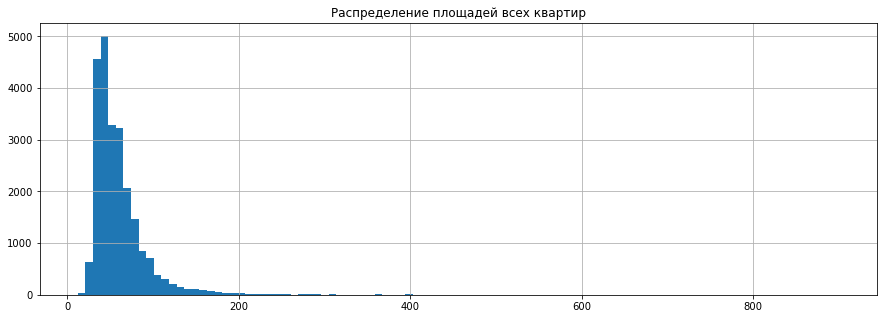

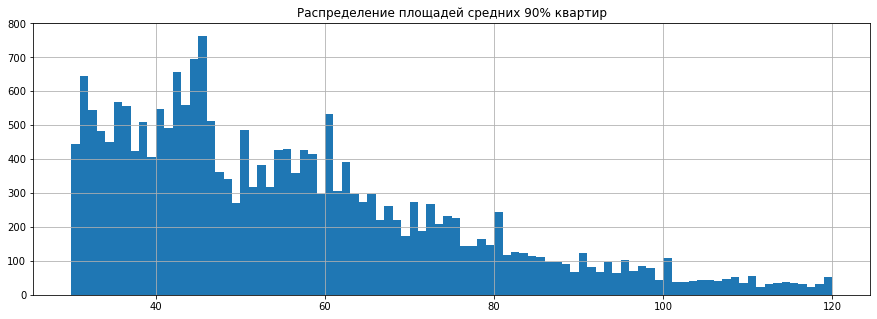

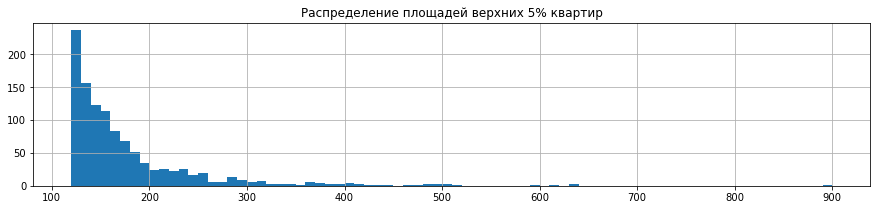

In [40]:
# гистограмма по всему интервалу
df.hist('total_area', bins=100, figsize=(15,5)) 
plt.title('Распределение площадей всех квартир')
plt.show()
# гистограмма по средним 90%
df.hist('total_area', bins=90, range =(30, 120), figsize=(15,5))
plt.title('Распределение площадей средних 90% квартир')
plt.show()
# гистограмма по верхним 5%
df.hist('total_area', bins=78, range =(120, 900), figsize=(15,3))
plt.title('Распределение площадей верхних 5% квартир')
plt.show()

Распределение площадей вполне ожидаемое - средняя площадь 60 кв. метров, медианная 52 - то есть выбросы не так критичны. Большинство объектов до 116 квадратных метров, встречаются от 200 до 650 - менее 1% процента объектов - это можно объяснить существованием в Петербурге огромных коммунальных квартир или элитной недвижимостью. Максимальное значение - 900 - резко выделяется.

### Количество комнат

In [41]:
display(df.rooms.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])) # общие данные
print(f"Корреляция между размером квартиры и количеством комнат {df['total_area'].corr(df['rooms']):.2f}") 

count   23650.00
mean        2.07
std         1.08
min         0.00
5%          1.00
25%         1.00
50%         2.00
95%         4.00
99%         5.00
max        19.00
Name: rooms, dtype: float64

Корреляция между размером квартиры и количеством комнат 0.76


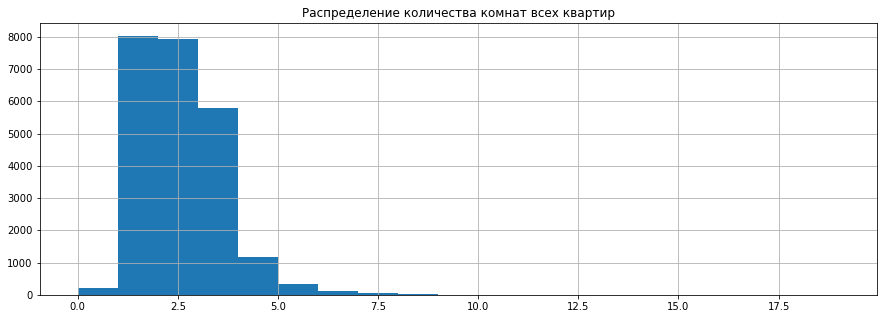

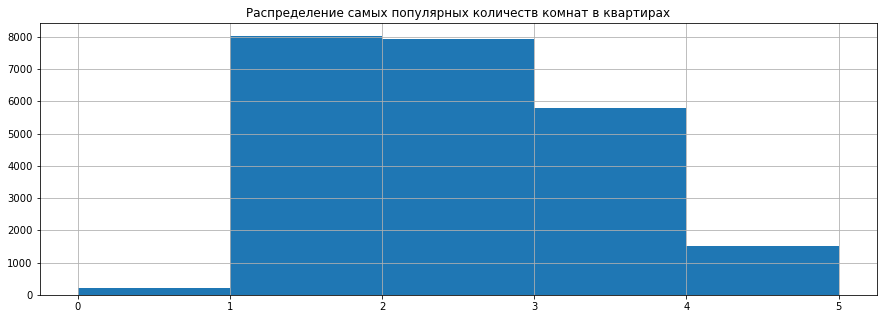

In [42]:
df.hist('rooms', bins=19, figsize=(15,5)) # гистограмма по всем объектам
plt.title('Распределение количества комнат всех квартир')
plt.show()
df.hist('rooms', bins=5, figsize=(15,5), range=(0, 5)) 
plt.title('Распределение самых популярных количеств комнат в квартирах')
plt.show()

Распределение комнатности тоже вполне ожидаемое - большинство объектов до 5 комнат, есть несколько от 6, их менее 1% процента объектов - это опять-таки можно объяснить существованием и относительной популярностью в Петербурге коммунальных квартир. Встречаются и объекты с 10+ квартирами, но это отдельные, выдающиеся случаи.

Корреляция между количеством комнат и площадью квартир высокая. Это понятно - чем больше помещений в квартире, тем больше должна быть ее общая площадь.

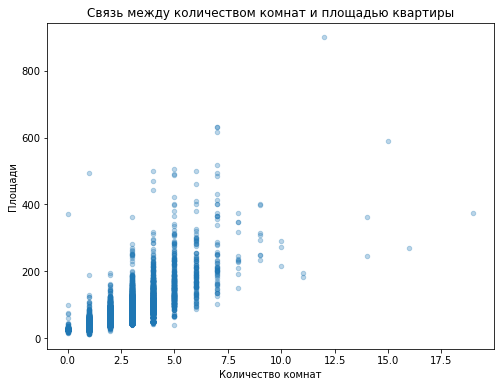

In [43]:
# соотношение площадей и количества комнат
df.plot.scatter(x='rooms', y='total_area', figsize=(8,6), alpha=0.3)
plt.xlabel('Количество комнат')
plt.ylabel('Площади')
plt.title('Связь между количеством комнат и площадью квартиры')
plt.show()

Заметны выбивающиеся точки - студия более 300 метров, однушка в 500 квадратов и некоторые другие. А также начиная от 8 комнат выборки слишком мелкие и потому не достоверные.
Посчитаем, какие площади с вероятностью 95% встречаются среди квартир одной комнатности.

In [44]:
room_info = pd.DataFrame(zip(df.groupby('rooms')['total_area'].quantile(q=0.95), df.groupby('rooms')['rooms'].count()))
room_info = room_info.rename(columns={0:'95%', 1:'count'})
room_info.index = sorted(df.rooms.unique())
room_info = room_info[['count', '95%']]
room_info # табличка с двумя столбцами - количеством квартир каждой комнатности и их наиболее вероятная площадь

count    95%
0     208  35.00
1    8025  49.81
2    7924  80.00
3    5797 120.00
4    1175 180.86
5     326 289.50
6     105 325.76
7      59 527.10
8      12 359.02
9       8 399.30
10      3 288.26
11      2 193.58
12      1 900.00
14      2 357.12
15      1 590.00
16      1 270.00
19      1 374.60

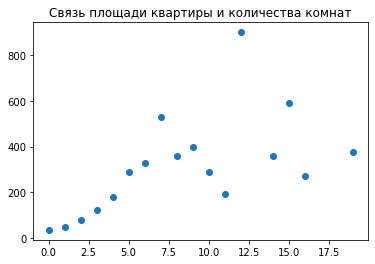

In [45]:
# еще раз посмотрим на распределение
x=room_info.index
plt.scatter(x, room_info['95%'])
plt.title('Связь площади квартиры и количества комнат')
plt.show()

Действительно, положительная корреляция более заметна среди квартир до 7 комнат - а дальше при выборке из менее чем 50 объектов в каждой категории говорить о закономерностях не приходится.

### Высота потолков

Посмотрим на распределение высот потолков еще раз, после замены пропусков.

count   23650.00
mean        2.70
std         0.69
min         1.00
5%          2.50
25%         2.60
50%         2.65
95%         3.12
max       100.00
Name: ceiling_height, dtype: float64

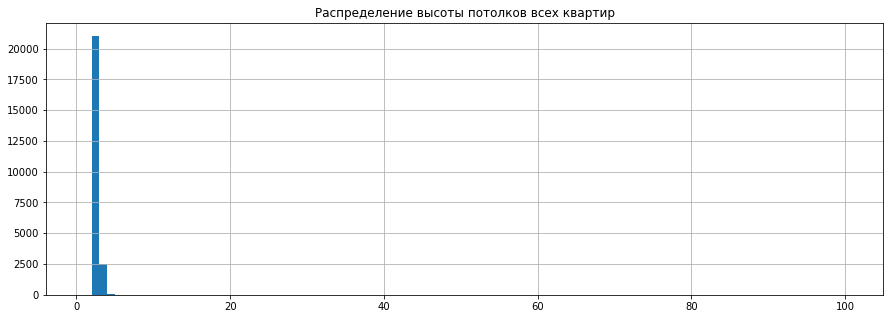

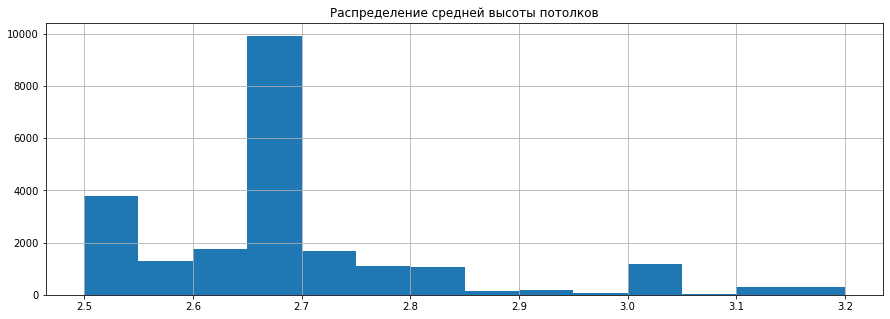

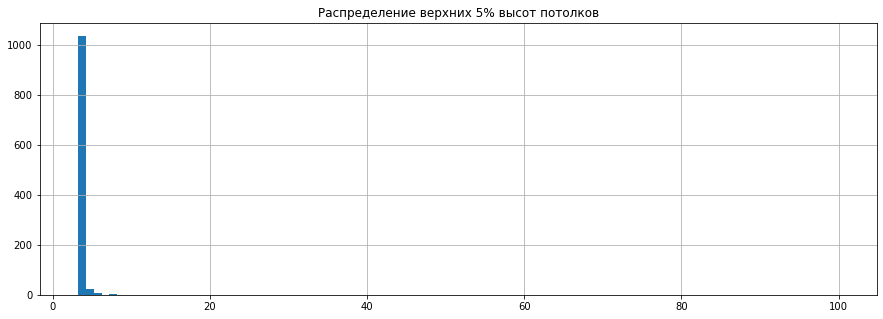

In [46]:
# общие данные
display(df.ceiling_height.describe(percentiles=[0.05, 1/4, 1/2, 0.95]))
# гистограмма по всем объектам
df.hist('ceiling_height', bins=100, figsize=(15, 5))
plt.title('Распределение высоты потолков всех квартир')
plt.show()
# гистограмма по средним 
df.hist('ceiling_height', bins=14, figsize=(15, 5), range=(2.5, 3.2))
plt.title('Распределение средней высоты потолков')
plt.show()
# гистограмма по верхним 
df.hist('ceiling_height', bins=96, figsize=(15, 5), range=(3.2, 100))
plt.title('Распределение верхних 5% высот потолков')
plt.show()

Выбиваются явно неправдоподобные значения - менее 2 метров и более 6. В "правдоподобном" интервале основная масса квартир находится от 2.5 до 3 метров - похоже на правду. Присмотримся к квартире с потолками 100 метров высотой - она совершенно не вызывает доверия. Кажется, от нее следует избавиться.

In [47]:
df[df['ceiling_height'] == 100]

total_images  price_1000  total_area       date  rooms  ceiling_height  \
22869             0    15000.00       25.00 2018-07-25      1          100.00   

       floors_total  living_area  floor  is_apartment  studio  open_plan  \
22869             5        11.20      5          True   False      False   

       kitchen_area  balcony    locality_name  airports_nearest  \
22869         11.00        5  Санкт-Петербург          34963.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
22869               8283.00              1.00         223.00   

       ponds_around3000  ponds_nearest  days_exposition  price_sq_m  \
22869              3.00          30.00            19.00      600.00   

       day_exposition  month_exposition  year_exposition floor_type  \
22869               3                 7             2018  последний   

       living_area_ratio  kitchen_area_ratio  
22869               0.45                0.44

### Цена

Посмотрим, как распределяются цены на квартиры.

count    23650.00
mean      6541.13
std      10896.40
min         12.19
5%        1864.50
25%       3400.00
50%       4650.00
95%      15300.00
99%      36000.00
max     763000.00
Name: price_1000, dtype: float64

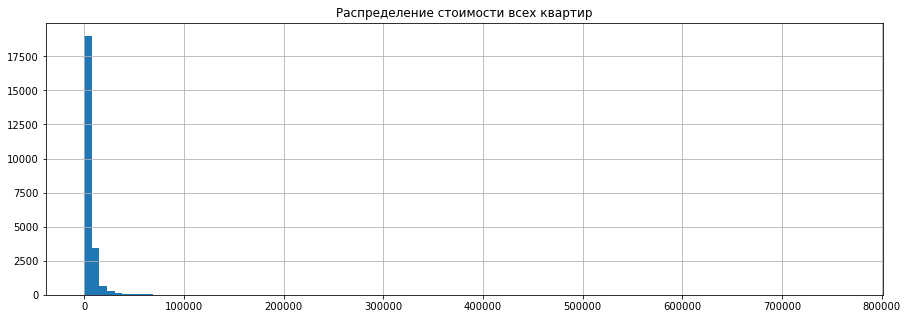

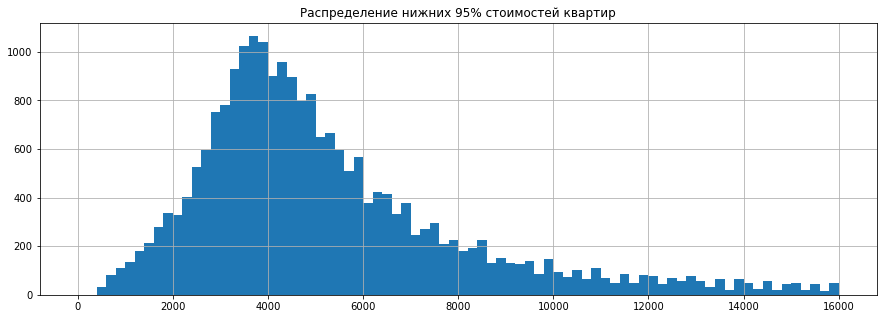

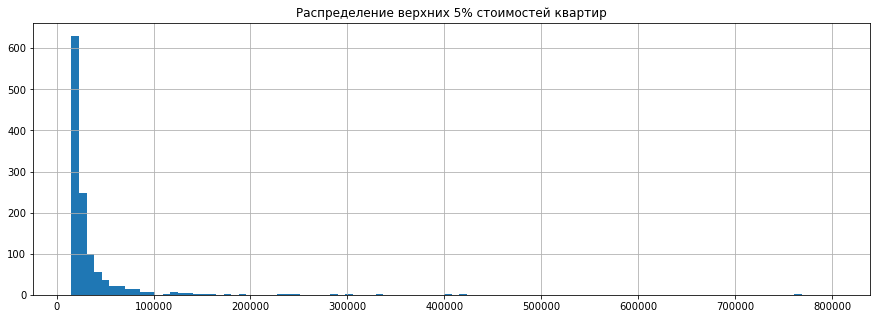

In [48]:
# общие данные
display(df.price_1000.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]))
# гистограмма по всем объектам
df.hist('price_1000', bins=100, figsize=(15, 5))
plt.title('Распределение стоимости всех квартир')
plt.show()
# гистограмма по 95% 
df.hist('price_1000', bins=80, figsize=(15, 5), range=(0, 16000))
plt.title('Распределение нижних 95% стоимостей квартир')
plt.show()
# гистограмма по верхним 5%
df.hist('price_1000', bins=100, figsize=(15, 5), range=(15300, 800000))
plt.title('Распределение верхних 5% стоимостей квартир')
plt.show()

Распределение стоимостей основной массы квартир - ожидаемое. Средняя стоимость - 6,5 млн, медианная - 4,65 млн. За сдвиг, судя по всему, ответственны экстремально высокие значения - выше 36 млн.

Выше 100 млн встречаются единичные объекты, и особняком стоит невероятный дворец, к тому же с максимальной стоимостью квадратного метра. 

In [49]:
df[df['price_1000'] == 763000] # что же там за дворец?

total_images  price_1000  total_area       date  rooms  ceiling_height  \
12971            19   763000.00      400.00 2017-09-30      7            2.65   

       floors_total  living_area  floor  is_apartment  studio  open_plan  \
12971            10       250.00     10         False   False      False   

       kitchen_area  balcony    locality_name  airports_nearest  \
12971         99.14        2  Санкт-Петербург          25108.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
12971               3956.00              1.00         530.00   

       ponds_around3000  ponds_nearest  days_exposition  price_sq_m  \
12971              3.00         756.00            33.00     1907.50   

       day_exposition  month_exposition  year_exposition floor_type  \
12971               6                 9             2017  последний   

       living_area_ratio  kitchen_area_ratio  
12971               0.62                0.25

Построим таже гистограмму цены квадратного метра.

count   23650.00
mean       99.43
std        50.34
min         0.11
5%         41.27
25%        76.61
50%        95.00
95%       160.73
99%       267.23
max      1907.50
Name: price_sq_m, dtype: float64

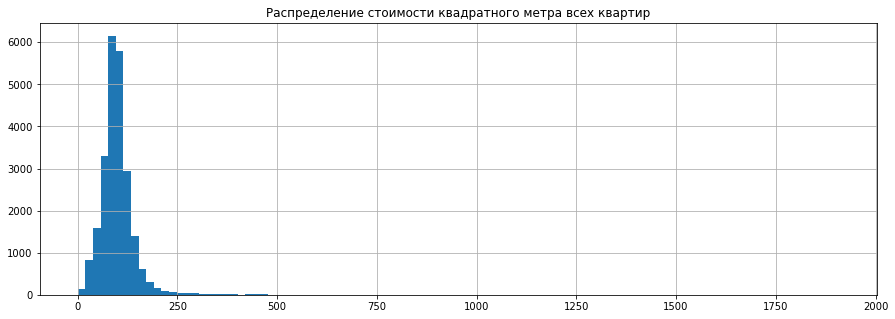

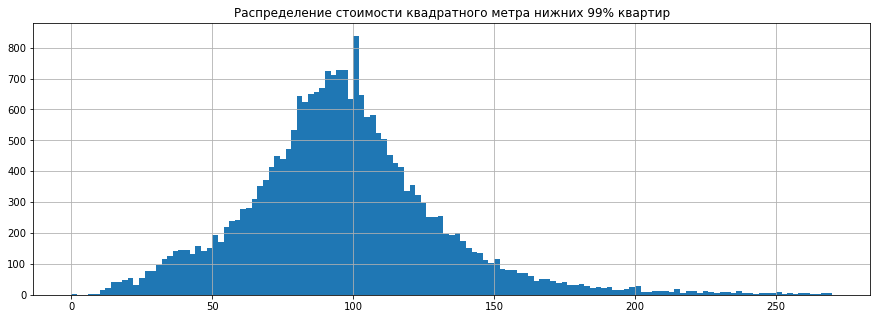

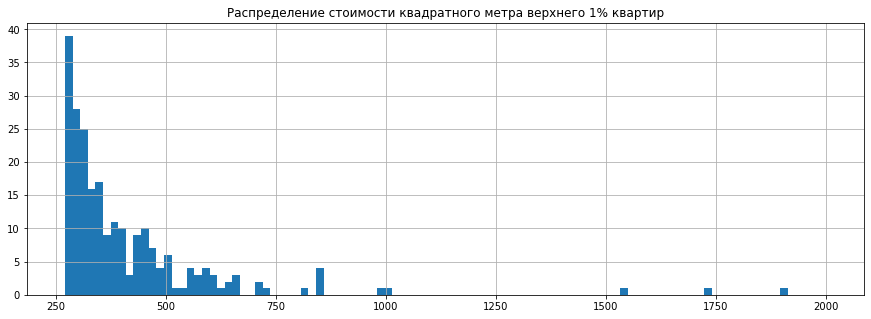

In [50]:
# общие данные
display(df.price_sq_m.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]))
# гистограмма по всем объектам
df.hist('price_sq_m', bins=100, figsize=(15, 5))
plt.title('Распределение стоимости квадратного метра всех квартир')
plt.show()
# гистограмма по 99% 
df.hist('price_sq_m', bins=135, figsize=(15, 5), range=(0, 270))
plt.title('Распределение стоимости квадратного метра нижних 99% квартир')
plt.show()
# гистограмма по верхнему 1%
df.hist('price_sq_m', bins=100, figsize=(15, 5), range=(270, 2000))
plt.title('Распределение стоимости квадратного метра верхнего 1% квартир')
plt.show()

Распределение очень близко к нормальному. Экстремальной можно назвать стоимость квадратого метра свыше 270 тыс. 

Посмотрим, как зависит стоимость квадратного метра от размера квартиры.

In [51]:
(
    df[df['rooms'] < 7].groupby('rooms')[['price_sq_m']].median()
    .sort_values(by='price_sq_m', ascending=False)
)

price_sq_m
rooms            
0          105.08
1          100.00
6           99.41
5           96.52
2           92.81
4           92.61
3           88.98

В целом, распределение ожидаемое - самые дорогие небольшие квартиры, студии и однушки, после них идут 5- и 6-комнатные квартиры, которые чаще расположены в старом фонде и обладают помимо утилитарной к тому же культурной ценностью, а дальше рядовые 2-, 3- и 4-комнатные квартиры. 

Построим диаграмму взаимного распределения площади и стоимости квартир.

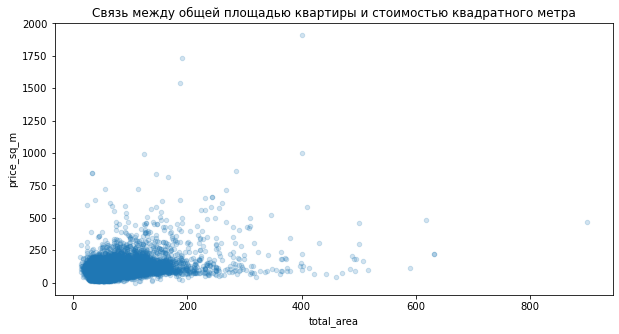

Линейная корреляция между площадью и стоимостью квадратного метра 0.302


In [52]:
df.plot.scatter('total_area', 'price_sq_m', figsize=(10,5), alpha=0.2)
plt.title('Связь между общей площадью квартиры и стоимостью квадратного метра')
plt.show()
# посмотрим на корреляцию численно
print(f'Линейная корреляция между площадью и стоимостью квадратного метра {df.total_area.corr(df.price_sq_m):.3f}')

Корреляция слабая, но на графике видно плотное облако точек и отдельные выбивающиеся объекты. Можно заметить, что с увеличением площади стоимость квадратного метра немного уменьшается.

### Время продажи квартиры

count   20470.00
mean      180.75
std       219.78
min         1.00
5%          9.00
25%        45.00
50%        95.00
95%       647.55
99%      1069.00
max      1580.00
Name: days_exposition, dtype: float64

3180


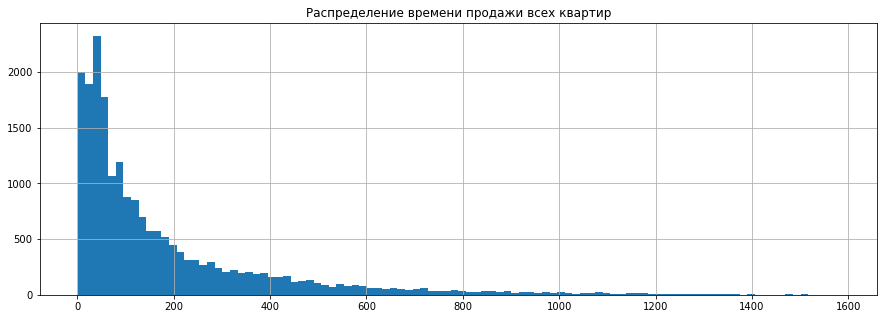

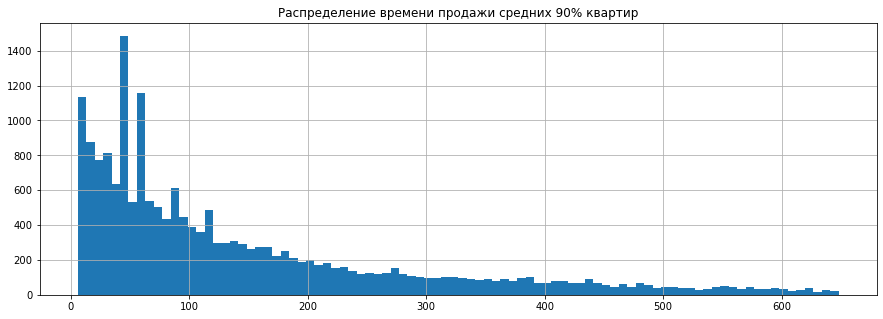

In [53]:
# описание данных
display(df['days_exposition'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]))
# количество пропусков
print(df['days_exposition'].isna().sum())
# гистограмма по всем длительностям
df.hist('days_exposition', bins=100, figsize=(15, 5))
plt.title('Распределение времени продажи всех квартир')
plt.show()
# гистограмма по средним 90%
df.hist('days_exposition', bins=90, figsize=(15, 5), range=(6, 648))
plt.title('Распределение времени продажи средних 90% квартир')
plt.show()

In [54]:
# группировка по длительности - найдем пики на графике
df.groupby('days_exposition')['date'].count().sort_values(ascending=False).head(10)

days_exposition
45.00    879
60.00    538
7.00     234
30.00    208
90.00    203
4.00     174
3.00     158
5.00     152
14.00    148
9.00     142
Name: date, dtype: int64

Среднее время продажи составляет почти полгода - 181 день, а медианное - три месяца, 95 дней. На такую разницу влияют экстремальные длительности - крайне долгие, свыше 650 дней (это почти 22 месяца!), и крайне быстрые, меньше 9 дней. При этом у 13% объектов не указан срок продажи. 

Внезапные пики возникают на 45 и 60 днях. Возможно, это вызвано особенностями платформы размещения объявлений и их автоматическим снятием с продажи после указанных сроков. Дальше идут неделя, 30 и 90 дней - очень "ровные" числа, возможно, также связанные с правилами платформы. 

При этом быстрее всего квартиры продаются тем быстрее, чем меньше в них комнат (если не учитывать квартиры от 7 комнат - как мы помним, таких в нашем датасете совсем мало и данные по ним слишком узкие). 

days_exposition
rooms                 
0                45.00
1                81.00
2                91.00
3               114.00
4               155.50
5               185.50
6               201.50

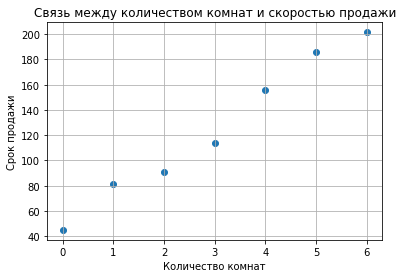

In [55]:
# медианные длительности по комнатностям
room_time = df[df['rooms'] < 7].pivot_table(index='rooms', values='days_exposition', aggfunc='median')
display(room_time)

plt.scatter(room_time.index, room_time)
plt.grid()
plt.xticks(room_time.index)
plt.xlabel('Количество комнат')
plt.ylabel('Срок продажи')
plt.title('Связь между количеством комнат и скоростью продажи')
plt.show()

Маленькие квартиры самые дорогие, но в среднем продаются быстрее всего.

### Редкие и выбивающиеся значения

Ранее мы показали, какие значения можно назвать редкими:

* высота потолка 100 м
* стоимость квадратного метра более 270 тыс.

Также можно заметить, что жилых зданий в Ленобласти выше 35 этажей не существует. Возможно, у этих объектов город указан ошибочно. 

Так как эти объекты добавляют шума в данные, от них следует избавиться.

После этого заменим выбивающиеся высоты потолков на медианные, а также избавимся от квартир, чья площадь превышает 99% перцентиль для такой комнатности.

In [56]:
# в новый датафрейм возьмем только достоверные данные

df_good = df.loc[(df['price_sq_m'] < 270) & (df['ceiling_height'] != 100) & (df['floors_total']  < 36)]

# недостоверные высоты потолков заменим медианой
df_good.loc[(df_good['ceiling_height'] < 2.2) | (df_good['ceiling_height'] > 6), 
            'ceiling_height'] = df_good['ceiling_height'].median()

# оставим только квартиры с таким количеством комнат, которое встречается больше 1 раза. 
room_info = room_info[room_info['count'] > 1]
df_good = df_good.loc[df['rooms'].isin(room_info.index)]

# заменим площади квартир в верхних 5% на нули и выкинем их
for i, row in room_info.iterrows():
    df_good.loc[(df_good['rooms'] == i) & (df_good['total_area'] > row[1]), 'total_area'] = 0
df_good = df_good.loc[df_good['total_area'] != 0]
df_good = df_good.reset_index(drop=True)

# посмотрим, что получилось
df_good.describe(percentiles=[0.05, 1/2, 0.95, 0.99])

total_images  price_1000  total_area    rooms  ceiling_height  \
count      22373.00    22373.00    22373.00 22373.00        22373.00   
mean           9.81     5577.19       57.31     2.06            2.69   
std            5.64     4270.88       28.64     1.05            0.20   
min            0.00      430.00       12.00     0.00            2.20   
5%             1.00     1850.00       30.90     1.00            2.50   
50%            9.00     4500.00       50.30     2.00            2.65   
95%           20.00    12704.15      104.80     4.00            3.10   
99%           20.00    22900.00      168.00     5.00            3.50   
max           50.00    91500.00      517.00    14.00            5.20   

       floors_total  living_area    floor  kitchen_area  balcony  \
count      22373.00     22373.00 22373.00      22373.00 22373.00   
mean          10.69        33.64     5.87         10.22     0.59   
std            6.59        19.43     4.87          5.10     0.95   
min            1.00         2.00     1.00          0.00     0.00   
5%             4.00        15.20     1.00          5.50     0.00   
50%            9.00        30.00     4.00          9.00     0.00   
95%           25.00        64.79    16.00         18.90     2.00   
99%           26.00       106.03    23.00         30.00     5.00   
max           35.00       347.50    33.00         99.14     5.00   

       airports_nearest  city_centers_nearest  parks_around3000  \
count          16949.00              16966.00          16967.00   
mean           28739.08              14483.99              0.59   
std            12755.95               8554.37              0.78   
min                0.00                181.00              0.00   
5%             11459.00               3771.50              0.00   
50%            26726.00              13277.00              0.00   
95%            51333.00              31861.00              2.00   
99%            58229.24              50125.00              3.00   
max            84869.00              65968.00              3.00   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
count        7341.00          16967.00        8321.00         19477.00   
mean          488.62              0.74         526.13           177.15   
std           332.31              0.91         278.38           215.53   
min             1.00              0.00          13.00             1.00   
5%             96.00              0.00          95.00             9.00   
50%           456.00              0.00         512.00            93.00   
95%           952.00              3.00         982.00           630.00   
99%          2102.00              3.00        1159.00          1050.48   
max          3190.00              3.00        1344.00          1580.00   

       price_sq_m  day_exposition  month_exposition  year_exposition  \
count    22373.00        22373.00          22373.00         22373.00   
mean        94.92            3.57              6.39          2017.38   
std         33.03            1.79              3.49             1.03   
min          7.96            1.00              1.00          2014.00   
5%          40.41            1.00              1.00          2015.00   
50%         93.88            4.00              6.00          2017.00   
95%        150.00            7.00             12.00          2019.00   
99%        196.90            7.00             12.00          2019.00   
max        269.74            7.00             12.00          2019.00   

       living_area_ratio  kitchen_area_ratio  
count           22373.00            22373.00  
mean                0.58                0.19  
std                 0.10                0.07  
min                 0.04                0.00  
5%                  0.40                0.10  
50%                 0.58                0.18  
95%                 0.72                0.30  
99%                 0.77                0.40  
max                 0.92                0.79

Таким образом мы выкинули около 5% объектов, снизили максимальную площадь до 517 кв.м., максимальную стоимость до 91.5 млн и практически не затронули остальные параметры. 

### Исследование стоимости квартир
Проверим, какие факторы влияют на стоимости квартир и как сильно.

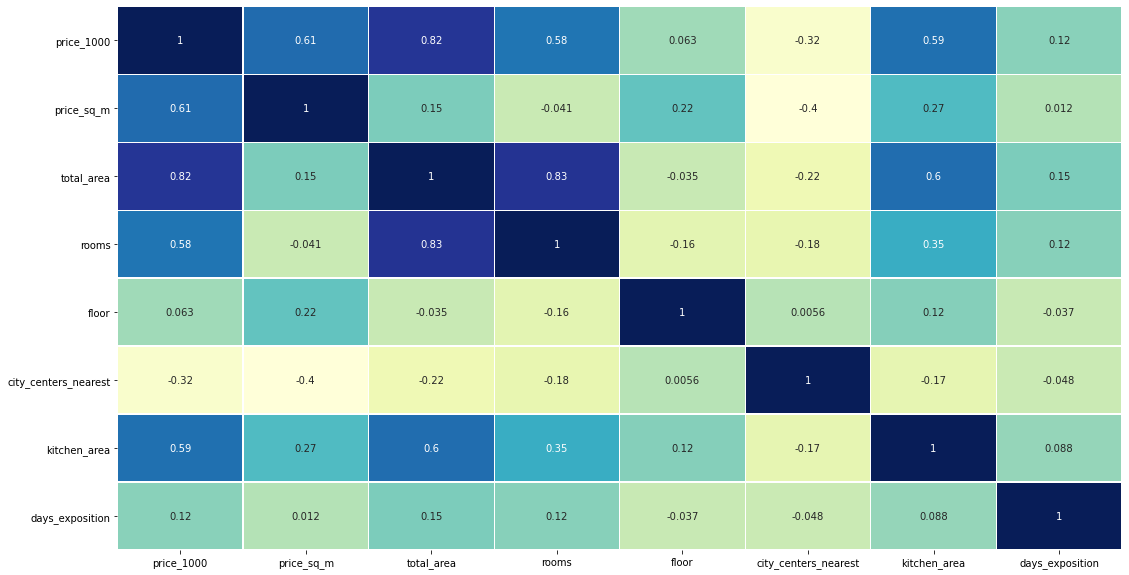

In [57]:
# посмотрим на матрицу корреляции
plt.figure(figsize=(18, 10))
sns.heatmap(df_good[['price_1000', 'price_sq_m', 'total_area', 'rooms', 
         'floor', 'city_centers_nearest', 'kitchen_area', 'days_exposition']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

Сильная корреляция наблюдается между общей ценой объекта и его площадью, и между площадью и количеством комнат, что вполне ожидаемо. Средняя - между общей ценой и ценой 1 кв. м, общей ценой и количеством комнат и относительной площадью кухни. Слабая отрицательная корреляция между расстоянием до центра города и ценой - к окраинам квартиры немного дешевле как в целом, так и за 1 кв. м.

Посмотрим, как зависит стоимость 1 кв.м от этажа квартиры - первый, последний или средний. 

In [58]:
price_floor_type = (
    df_good.pivot_table(index='floor_type', values='price_sq_m', columns='rooms')
)
display(price_floor_type)

rooms          0      1     2     3      4      5      6      7      8   \
floor_type                                                                
первый      94.12  86.25 76.19 76.85  80.11  92.09 114.88 126.37 109.86   
последний  103.95  89.97 81.02 85.98  97.66 113.98 106.70 114.71  71.36   
средний    108.69 102.27 97.45 94.38 102.78 105.12 111.63 115.46  97.59   

rooms          9     10    11     14  
floor_type                            
первый     125.55   NaN   NaN    NaN  
последний   76.00 84.37 95.26    NaN  
средний     85.67 71.73   NaN 116.78

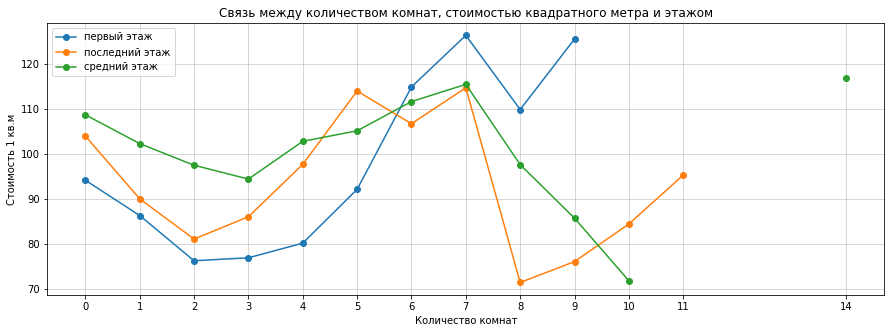

In [59]:
fig, ax = plt.subplots(figsize=(15, 5))

#plt.figure(figsize=(15, 5))
for i in price_floor_type.index:
    ax.plot(price_floor_type.columns, price_floor_type.loc[i], marker ='o', label=f'{i} этаж')
plt.xticks(price_floor_type.columns)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость 1 кв.м')
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(loc='upper left')
plt.title('Связь между количеством комнат, стоимостью квадратного метра и этажом')
plt.show()

График имеет дырки в местах, где не на всех этажах попадались квартиры такой комнатности.

Действительно, как и подсказывает жизненный опыт - самые дешевые квадратные метры на первом этаже, самые дорогие - на средних. Первый этаж становится самым дорогим при 6-9 комнатах - возможно, потому, что такие квартиры можно использовать под отели или перевести в коммерческую недвижимость.

Площадь квартиры и стоимость квадратного метра не имеет линейной корреляции, но связь между этими величинами есть: это подтверждают медианные стоимости квартир. Выше мы уже составляли таблицу стоимости квадратного метра в квартирах разной комнатности, попробуем построить график зависимости медианной стоимости квадратного метра от количества комнат. Обрежем данные - 20 км от центра (примерно КАД) и количество комнат до 7 (более крупные выборки). 

Зависимость явная, но не линейная - от студии к трехкомнатным квартирам стоимость кваратного метра явно снижается, а дальше с увеличением количества комнат растет - влияет элитная недвижимость и старый-старый фонд.

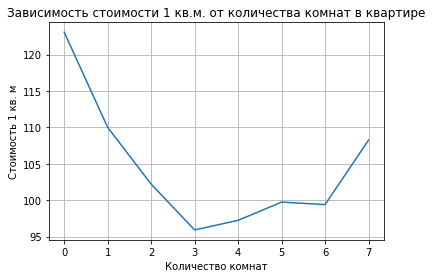

In [60]:
df_good[(df_good['city_centers_nearest']/1000<20) & (df_good['rooms'] < 8)].groupby('rooms')['price_sq_m'].median().plot()
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость 1 кв. м')
plt.title('Зависимость стоимости 1 кв.м. от количества комнат в квартире')
plt.grid()
plt.show()

Проверим также зависимость стоимости от даты размещения.

In [61]:
# зависимость цены от дня недели
day_price = df_good.pivot_table(index='day_exposition', values=('price_sq_m', 'price_1000'))

# зависимость цены от месяца
month_price = df_good.pivot_table(index='month_exposition', values=('price_sq_m', 'price_1000'))

html_str = ''
s1 = day_price.style.format({'price_sq_m': '{:.3f}', 'price_1000':'{:.3f}'}).render().replace('table','table style="display:inline; margin:10px"')
s2 = month_price.style.format({'price_sq_m': '{:.3f}', 'price_1000':'{:.3f}'}).render().replace('table','table style="display:inline; margin:30px"')
html_str += f'<td>{s1}</td>'
html_str += f'<td>{s2}</td>'
display_html(html_str, raw = True)

price_1000 
 price_sq_m 
 
 
 day_exposition 
   
   
 
 
 
 
 1 
 5675.916 
 95.245 
 
 
 2 
 5565.771 
 95.207 
 
 
 3 
 5631.971 
 95.428 
 
 
 4 
 5673.645 
 94.627 
 
 
 5 
 5547.595 
 95.240 
 
 
 6 
 5331.424 
 93.252 
 
 
 7 
 5376.970 
 94.208 
 
 
 
 
 
 
 
   
 price_1000 
 price_sq_m 
 
 
 month_exposition 
   
   
 
 
 
 
 1 
 5609.990 
 95.263 
 
 
 2 
 5485.414 
 94.212 
 
 
 3 
 5675.809 
 95.559 
 
 
 4 
 5578.114 
 96.315 
 
 
 5 
 5599.327 
 94.505 
 
 
 6 
 5380.124 
 92.445 
 
 
 7 
 5565.037 
 94.660 
 
 
 8 
 5450.915 
 95.560 
 
 
 9 
 5789.399 
 96.449 
 
 
 10 
 5519.143 
 94.401 
 
 
 11 
 5676.825 
 95.262 
 
 
 12 
 5550.779 
 93.567

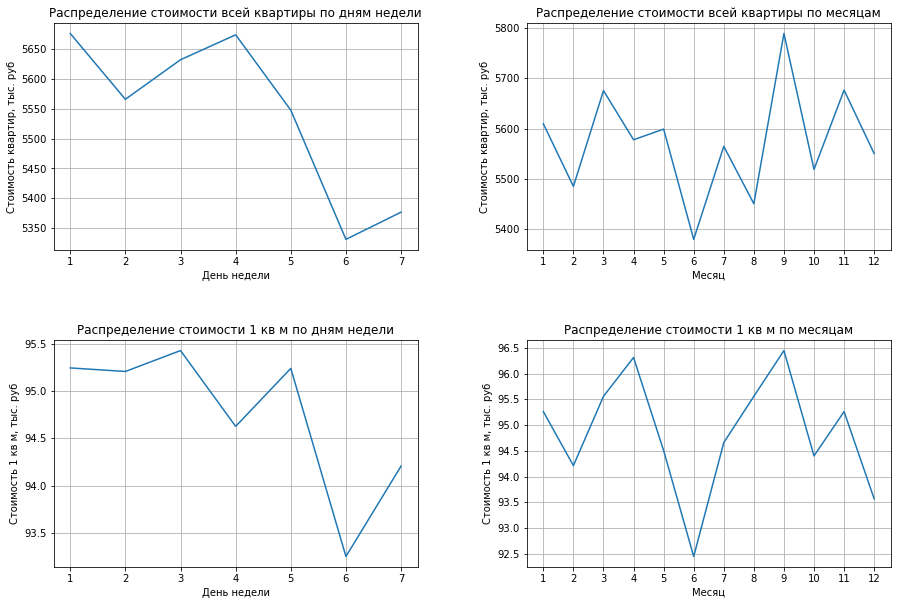

In [62]:
# построим графики
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].plot(day_price.index, day_price['price_1000'])
ax[0][1].plot(month_price.index, month_price['price_1000'])
ax[0][0].set(xlabel='День недели', ylabel='Стоимость квартир, тыс. руб', 
          title='Распределение стоимости всей квартиры по дням недели')
ax[0][1].set(xlabel='Месяц', ylabel='Стоимость квартир, тыс. руб', 
          title='Распределение стоимости всей квартиры по месяцам', xticks=month_price.index)
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].plot(day_price.index, day_price['price_sq_m'])
ax[1][1].plot(month_price.index, month_price['price_sq_m'])
ax[1][0].set(xlabel='День недели', ylabel='Стоимость 1 кв м, тыс. руб', 
          title='Распределение стоимости 1 кв м по дням недели')
ax[1][1].set(xlabel='Месяц', ylabel='Стоимость 1 кв м, тыс. руб', 
          title='Распределение стоимости 1 кв м по месяцам', xticks=month_price.index)
ax[1][0].grid()
ax[1][1].grid()
plt.subplots_adjust(wspace = 0.3, hspace = 0.4) 
plt.show()

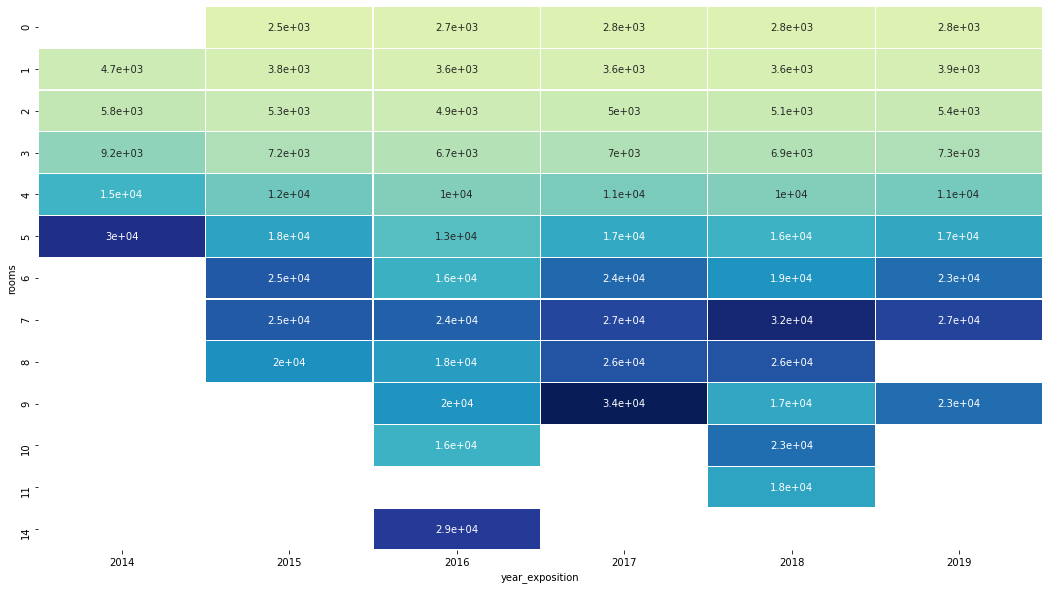

In [63]:
# посмотрим на зависимость стоимости квартир в разные года от количества комнат
year_price_rooms=df_good.pivot_table(index='rooms', values='price_1000', columns='year_exposition')
plt.figure(figsize=(18, 10))
sns.heatmap(year_price_rooms, annot=True, cmap='YlGnBu', cbar=False,  linewidths=.2, center = 15000)
plt.show()

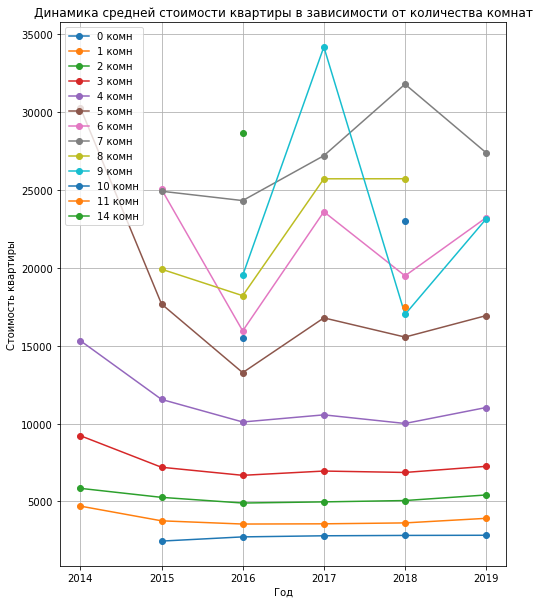

In [64]:
# построим графики динамики
fig, ax = plt.subplots(figsize=(8, 10))

for i in year_price_rooms.index:
    ax.plot(year_price_rooms.columns, year_price_rooms.loc[i], marker ='o', label=f'{i} комн')
plt.xticks(year_price_rooms.columns)
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.grid()
plt.legend(loc='upper left')
plt.title('Динамика средней стоимости квартиры в зависимости от количества комнат')
plt.show()

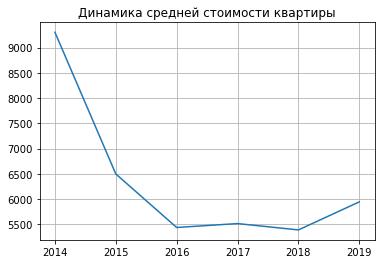

In [65]:
# средняя стоимость по годам в целом
year_price = df_good.pivot_table(index='year_exposition', values='price_1000')
display(year_price.style.format({'price_1000': '{:.2f}'}))
plt.title('Динамика средней стоимости квартиры')
plt.plot(year_price)
plt.grid()
plt.show()

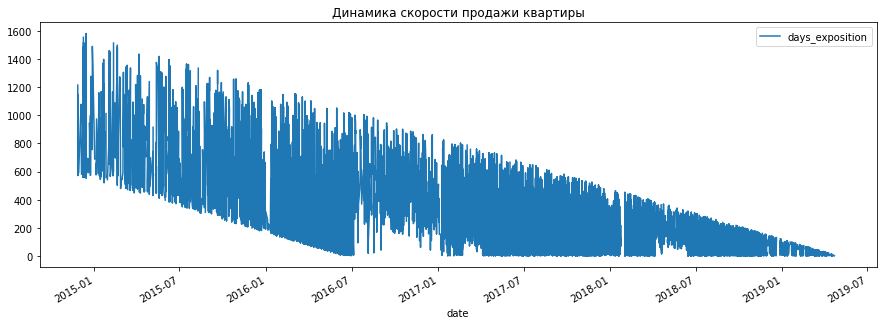

In [66]:
# построим график зависимости срока продажи от даты
df_good.plot('date', 'days_exposition', figsize=(15,5))
plt.title('Динамика скорости продажи квартиры')
plt.show()

Зависимости стоимости от дня недели, когда квартира была выставлена на продажу, месяца и года практически нулевая. Можно заметить, что в 2016 году был небольшой спад средней стоимости, но к 2019 году цены выросли обратно. И только студии стабильно дорожали год от года.

Очень интересно выглядит график длительности размещения по дате размещения. На нем тоже видно, что в 2016 году, во время спада цен, и продажи совершались быстрее.

Чем меньше квартира, чем меньше в ней комнат, тем быстрее она продается.

Дороже всего квартиры, выложенные на продажу в понедельник и четверг, а дешевле всего - в выходные.
В июне квартиры несколько дешевле, дороже всего в сентябре. 
Средняя стоимость квартир была ниже всего в 2016-2018 годах. При этом студии стабильно дорожали год от года, а остальные квартиры следовали общему тренду.      




### Географические факторы - населенные пункты

В названиях населенных пунктов встречается достаточно большое количество скрытых дублей - самое заметное в них то, что некоторые названия написаны через "ё", а некоторые через "е". Исправим это - уберем все буквы "ё". 

Кроме того, некоторые населенные пункты имеют в названии обозначения типа пункта - "поселок" или "деревня", например. Избавимся от них тоже.

In [67]:
# напишем функцию для преобразования строк
def place_short(text):
    text = text.replace('ё', 'е')
    dict =['деревня ', 
           'коттеджный поселок ', 'садовое товарищество ', 
           'поселок городского типа ', 'поселок при железнодорожной станции ', 'поселок станции ', 
           'городской поселок ', 'садоводческое некоммерческое товарищество '
           'посёлок городского типа ', 'поселок имени', 'поселок ', 'село ']
    for i in dict:
        text = text.replace(i, '')  
    return text   
# создадим столбец с укороченными названиями
df_good['locality_name_short'] = df_good['locality_name'].apply(place_short)
# посмотрим, что получилось
print(df_good.locality_name_short.sample(20))

14995            Кудрово
12047    Санкт-Петербург
13812       Бокситогорск
12316             Мурино
3585     Санкт-Петербург
17308    Санкт-Петербург
11737    Санкт-Петербург
3437     Санкт-Петербург
8249     Санкт-Петербург
4348              Шушары
10453    Санкт-Петербург
16487         Светогорск
22066            Колпино
18051          Гостилицы
15780    Санкт-Петербург
16777    Санкт-Петербург
3156              Пушкин
6273     Санкт-Петербург
7345              Вырица
522      Санкт-Петербург
Name: locality_name_short, dtype: object


In [68]:
# сравним, что получилось
print(len(df_good.locality_name.unique()))
print(len(df_good.locality_name_short.unique()))

362
303


Выберем 10 населенных пунктов с наибольшим числом объявлений и заодно оценим эффект от замены имени места.

In [69]:
display(df_good.groupby('locality_name_short')['date'].count().sort_values(ascending=False).head(10))
display(df_good.groupby('locality_name')['date'].count().sort_values(ascending=False).head(10))

locality_name_short
Санкт-Петербург    14626
Мурино               584
Кудрово              463
Шушары               431
Всеволожск           387
Пушкин               339
Колпино              332
Парголово            314
Гатчина              301
Выборг               229
Name: date, dtype: int64

locality_name
Санкт-Петербург      14626
посёлок Мурино         517
посёлок Шушары         431
Всеволожск             387
Пушкин                 339
Колпино                332
посёлок Парголово      314
Гатчина                301
деревня Кудрово        295
Выборг                 229
Name: date, dtype: int64

Список лидеров не изменился, но немного изменился порядок. 

Посмотрим, какая стоимость квадратного метра в этих населенных пунктах.

In [70]:
# стоимость квадратного метра в 10 самых популярных населенных пунктах
display(df_good.pivot_table(index='locality_name_short', 
                            values=['price_sq_m', 'price_1000'], 
                            aggfunc={'price_sq_m':['count', 'median', 'mean'], 'price_1000': ['median', 'mean']})
        .sort_values(by=[('price_sq_m','count')], ascending=False).head(10)
)
display(
    df_good.pivot_table(index='locality_name_short', 
                        values=['price_sq_m', 'price_1000'], 
                        aggfunc={'price_sq_m':['count', 'median', 'mean'], 'price_1000': ['median', 'mean']})
    .sort_values(by=[('price_1000','mean')], ascending=False).head(10)
)

display(df_good[df_good['locality_name_short'] == 'Хязельки'])

price_1000         price_sq_m              
                          mean  median      count   mean median
locality_name_short                                            
Санкт-Петербург        6708.13 5300.00      14626 108.90 103.30
Мурино                 3670.97 3400.00        584  86.21  86.31
Кудрово                4343.86 3850.00        463  95.54  95.82
Шушары                 4094.50 3950.00        431  78.76  77.05
Всеволожск             3710.59 3450.00        387  67.40  65.85
Пушкин                 5968.89 5100.00        339 102.21 100.00
Колпино                3934.94 3600.00        332  75.45  74.72
Парголово              4528.77 4150.00        314  91.23  92.29
Гатчина                3461.36 3090.00        301  69.01  67.93
Выборг                 3132.94 2800.00        229  58.07  58.11

price_1000          price_sq_m              
                          mean   median      count   mean median
locality_name_short                                             
Хязельки              11000.00 11000.00          1  47.83  47.83
Бор                   10397.60 10397.60          2  59.35  59.35
Александровская        8725.00  8725.00          2  70.26  70.26
Санкт-Петербург        6708.13  5300.00      14626 108.90 103.30
Сестрорецк             6092.67  5250.00        166 102.58  99.96
Пушкин                 5968.89  5100.00        339 102.21 100.00
Зеленогорск            5169.29  4250.00         21 103.85  97.19
Заневка                5119.80  4200.00          5  80.84  74.95
Репино                 4800.00  4800.00          2  86.54  86.54
Павловск               4778.58  3860.00         36  83.14  84.99

total_images  price_1000  total_area       date  rooms  ceiling_height  \
6974             3    11000.00      230.00 2018-03-01      5            2.50   

      floors_total  living_area  floor  is_apartment  studio  open_plan  \
6974             2       158.36      2         False   False      False   

      kitchen_area  balcony     locality_name  airports_nearest  \
6974         57.00        0  деревня Хязельки               NaN   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
6974                   NaN               NaN            NaN               NaN   

      ponds_nearest  days_exposition  price_sq_m  day_exposition  \
6974            NaN           419.00       47.83               4   

      month_exposition  year_exposition floor_type  living_area_ratio  \
6974                 3             2018  последний               0.69   

      kitchen_area_ratio locality_name_short  
6974                0.25            Хязельки

Если сортировать по количеству квартир в населенном пункте, то лидер - конечно, Санкт-Петербург. Но по средней стоимости квартиры лидер - деревня Хязельки, в которой всего один объект (вероятно, дом) продался с ценой 11 млн за полтора года.

In [71]:
html_str = ''
# населенные пункты с самым дорогим жильем
s = (
    df_good.pivot_table(index='locality_name_short', 
                        values='price_sq_m', 
                        aggfunc='median').sort_values(by='price_sq_m', ascending=False).head(10)
    .style.format({'price_sq_m': '{:.2f}'})
    .render().replace('table','table style="display:inline; margin:10px"')
)

html_str += f'<td>{s}</td>'
# населенные пункты с самым дешевым жильем
s2 = (
    df_good.pivot_table(index='locality_name_short', 
                        values='price_sq_m', 
                        aggfunc='median').sort_values(by='price_sq_m').head(10)
    .style.format({'price_sq_m': '{:.2f}'})
    .render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
display_html(html_str, raw = True)

price_sq_m 
 
 
 locality_name_short 
   
 
 
 
 
 Санкт-Петербург 
 103.30 
 
 
 Пушкин 
 100.00 
 
 
 Сестрорецк 
 99.96 
 
 
 Зеленогорск 
 97.19 
 
 
 Левашово 
 97.00 
 
 
 Кудрово 
 95.82 
 
 
 Парголово 
 92.29 
 
 
 Мистолово 
 90.89 
 
 
 Стрельна 
 87.74 
 
 
 Репино 
 86.54 
 
 
 
 
 
 
 
   
 price_sq_m 
 
 
 locality_name_short 
   
 
 
 
 
 Старополье 
 11.00 
 
 
 Свирь 
 11.48 
 
 
 Вахнова Кара 
 11.69 
 
 
 Выскатка 
 12.34 
 
 
 Совхозный 
 12.63 
 
 
 Малая Романовка 
 12.72 
 
 
 Тесово-4 
 12.93 
 
 
 Сижно 
 13.71 
 
 
 Ям-Тесово 
 13.71 
 
 
 Житково 
 14.96

### Географические факторы - районы Санкт-Петербурга

In [72]:
# создадим список с поселками и городами в составе СПб
spb_cities = ['Санкт-Петербург', 'Зеленогорск', 'Колпино', 'Красное Село', 'Кронштадт', 'Ломоносов', 'Павловск', 'Петергоф', 
              'Пушкин', 'Сестрорецк',  'Александровская', 'Белоостров', 'Комарово', 
              'Левашово', 'Лисий Нос', 'Металлострой', 'Молодежное', 'Парголово', 'Песочный', 
              'Петро-Славянка', 'Понтонный', 'Репино', 'Саперный', 'Серово', 'Смолячково', 'Солнечное', 'Стрельна', 
              'Тярлево', 'Усть-Ижора', 'Ушково', 
              'Шушары', 'Янино-1', 'Новое Девяткино', 'Кудрово', 'Всеволожск', 'Мурино', 'Бугры', 'Заневка']
# добавим столбец на основе этого списка
df_good['is_spb'] = df_good['locality_name_short'].isin(spb_cities)

In [73]:
# создаем столбец с расстоянием до центра в километрах
df_good['city_center1000'] = df_good['city_centers_nearest'] // 1000
display(df_good.head())

total_images  price_1000  total_area       date  rooms  ceiling_height  \
0            20    13000.00      108.00 2019-03-07      3            2.70   
1             7     3350.00       40.40 2018-12-04      1            2.65   
2            10     5196.00       56.00 2015-08-20      2            2.65   
3            10     2890.00       30.40 2018-09-10      1            2.65   
4             6     3700.00       37.30 2017-11-02      1            2.65   

   floors_total  living_area  floor  is_apartment  studio  open_plan  \
0            16        51.00      8         False   False      False   
1            11        18.60      1         False   False      False   
2             5        34.30      4         False   False      False   
3            12        14.40      5         False   False      False   
4            26        10.60      6         False   False      False   

   kitchen_area  balcony              locality_name  ...  parks_around3000  \
0         25.00        0            Санкт-Петербург  ...              1.00   
1         11.00        2             посёлок Шушары  ...              0.00   
2          8.30        0            Санкт-Петербург  ...              1.00   
3          9.10        0  городской посёлок Янино-1  ...               NaN   
4         14.40        1          посёлок Парголово  ...              0.00   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0         482.00              2.00         755.00              NaN   
1            NaN              0.00            NaN            81.00   
2          90.00              2.00         574.00           558.00   
3            NaN               NaN            NaN            55.00   
4            NaN              0.00            NaN           155.00   

   price_sq_m  day_exposition  month_exposition  year_exposition  floor_type  \
0      120.37               4                 3             2019     средний   
1       82.92               2                12             2018      первый   
2       92.79               4                 8             2015     средний   
3       95.07               1                 9             2018     средний   
4       99.20               4                11             2017     средний   

   living_area_ratio kitchen_area_ratio  locality_name_short  is_spb  \
0               0.47               0.23      Санкт-Петербург    True   
1               0.46               0.27               Шушары    True   
2               0.61               0.15      Санкт-Петербург    True   
3               0.47               0.30              Янино-1    True   
4               0.28               0.39            Парголово    True   

  city_center1000  
0           16.00  
1           18.00  
2           13.00  
3             NaN  
4           19.00  

[5 rows x 32 columns]

In [74]:
# проверим наличие пропусков в расстояниях до центра
(
    df_good[(df_good['city_center1000'].isna()) & (df_good['is_spb'] == True)]
    .groupby('locality_name_short')['date'].count().sort_values(ascending=False)
)

locality_name_short
Мурино             582
Кудрово            463
Всеволожск         387
Новое Девяткино    137
Бугры              111
Янино-1             66
Санкт-Петербург     40
Заневка              5
Шушары               4
Красное Село         2
Колпино              1
Кронштадт            1
Ломоносов            1
Пушкин               1
Name: date, dtype: int64

In [75]:
# заполним пропуски в расстояниях частей Санкт-Петербурга на основе медианного значения для данного населенного пункта
df_good['city_center1000'] = (
    df_good[df_good['is_spb'] == True]
    .groupby('locality_name_short')['city_center1000']
    .apply(lambda x: x.fillna(x.median()))
)

In [76]:
# рассчитаем медианную стоимость для каждого километра
area_price = df_good[df_good['is_spb']== True].pivot_table(index='city_center1000', values='price_sq_m').reset_index()
display(area_price.head(10).style.format({'price_sq_m': '{:.2f}'}))
# корреляция для всего города
print(f"Линейная корреляция расстояния до центра и цены квадрата {area_price['city_center1000'].corr(area_price['price_sq_m']):.3f}")
# корреляция для радиуса 20 км
area = area_price['city_center1000'] < 20
print(f"Линейная корреляция расстояния до центра и цены квадрата в радиусе 20 км {area_price[area]['city_center1000'].corr(area_price[area]['price_sq_m']):.3f}")

Линейная корреляция расстояния до центра и цены квадрата -0.765
Линейная корреляция расстояния до центра и цены квадрата в радиусе 20 км -0.939


[]

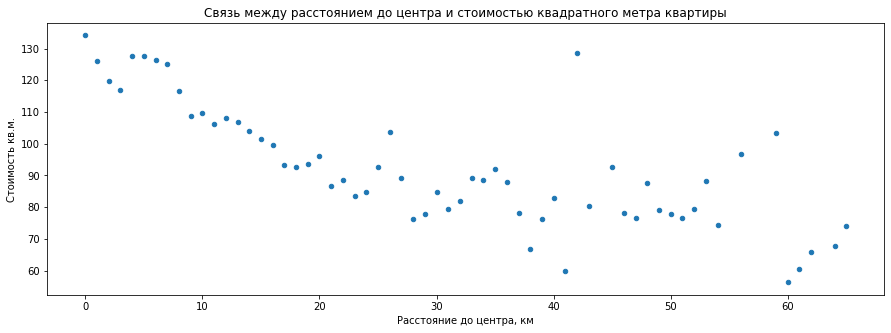

In [77]:
# построим график
area_price.plot.scatter(['city_center1000'], ['price_sq_m'], figsize=(15, 5))
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость кв.м.')
plt.title('Связь между расстоянием до центра и стоимостью квадратного метра квартиры')
plt.plot()

Оставим только объекты, у которых город указан именно как Санкт-Петербург

Корреляция отрицательная и сильная: с удалением от центра стоимость квартир снижается. Еще сильнее корреляция в радиусе 20 км от центра города - то есть примерно внутри КАД.    

In [78]:
# рассчитаем медианную стоимость для каждого километра только по СПб
spb_price = df_good[df_good['locality_name_short'] == "Санкт-Петербург"].pivot_table(index='city_center1000', values=['price_sq_m', 'price_1000'], aggfunc='mean').reset_index()
display(spb_price.head(10))
print(f"Линейная корреляция расстояния до центра и цены квадрата в Санкт-Петербурге {spb_price['city_center1000'].corr(area_price['price_sq_m']):.3f}")
display(spb_price.describe(percentiles=[0.05, 1/2, 0.95, 0.99]))

city_center1000  price_1000  price_sq_m
0             0.00    13379.26      134.16
1             1.00    12152.17      125.92
2             2.00    10507.61      119.74
3             3.00    10104.12      117.07
4             4.00    10934.07      127.58
5             5.00    10692.67      127.60
6             6.00     8821.00      126.35
7             7.00     8549.20      125.01
8             8.00     7756.06      116.68
9             9.00     6092.21      108.69

Линейная корреляция расстояния до центра и цены квадрата в Санкт-Петербурге -0.931


city_center1000  price_1000  price_sq_m
count            30.00       30.00       30.00
mean             14.50     6753.91      105.07
std               8.80     2703.51       17.97
min               0.00     3575.00       62.48
5%                1.45     3846.34       78.17
50%              14.50     5838.02      105.92
95%              27.55    11604.03      130.08
99%              28.71    13023.41      133.56
max              29.00    13379.26      134.16

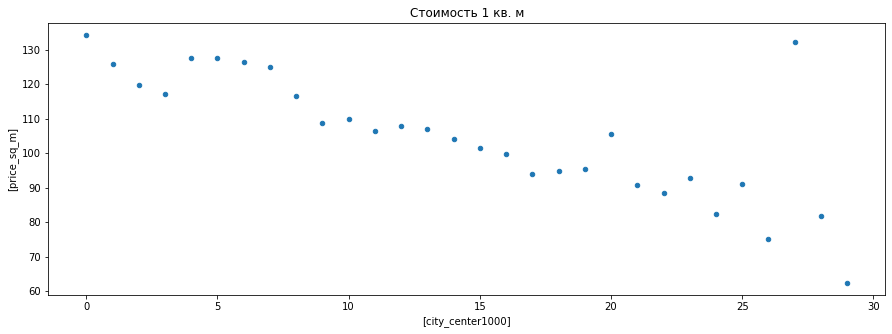

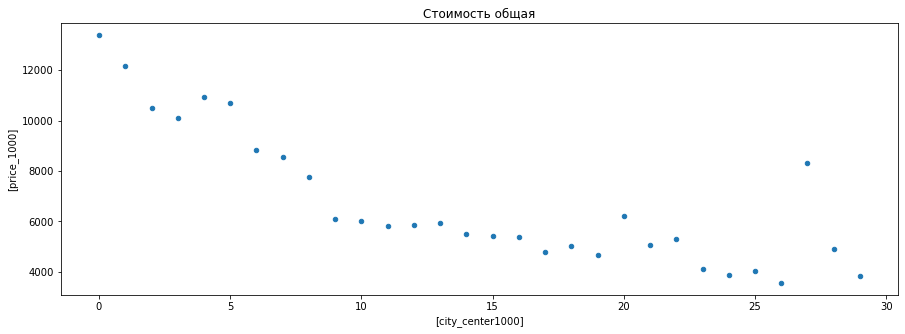

In [79]:
# построим график и сравним, как меняется общая стоимость и стоимость 1 кв. м
spb_price.plot.scatter(['city_center1000'], ['price_sq_m'], figsize=(15,5))
plt.title('Стоимость 1 кв. м')
plt.show()
spb_price.plot.scatter(['city_center1000'], ['price_1000'], figsize=(15,5))
plt.title('Стоимость общая')
plt.show()

По графику заметен скачок между 3 и 4 километрами. 3 км от центра (Адмиралтейства) - это кусок до Обводного канала на юге и почти вся Петроградская сторона на севере. Радиус в 3 км можно назвать центром Петербурга.  

Скачок на 4 км можно объяснить тем, что в эту область попадает очень дорогой Крестовский остров и Таврический сад.

### Квартиры в центре Санкт-Петербурга

In [80]:
# принимаем за центр радиус до 4 км
spb_center = df_good[df_good['city_center1000'] <= 4]
spb_center.head()

total_images  price_1000  total_area       date  rooms  ceiling_height  \
31              6    15500.00      149.00 2017-06-26      5            2.65   
56             18     7990.00       74.00 2017-08-24      2            2.65   
58              2    20000.00      118.00 2018-09-11      3            3.00   
93             32     9600.00       90.00 2017-09-26      4            2.65   
129            16     6500.00       51.80 2018-08-01      2            3.45   

     floors_total  living_area  floor  is_apartment  studio  open_plan  \
31              5       104.00      4         False   False      False   
56              4        43.00      4         False   False      False   
58              9        68.00      7         False   False      False   
93              5        67.00      2         False   False      False   
129             6        25.60      2         False   False      False   

     kitchen_area  balcony    locality_name  ...  parks_around3000  \
31          17.00        0  Санкт-Петербург  ...              0.00   
56          20.00        0  Санкт-Петербург  ...              1.00   
58          16.00        0  Санкт-Петербург  ...              1.00   
93           8.00        0  Санкт-Петербург  ...              0.00   
129          7.30        1  Санкт-Петербург  ...              2.00   

     parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
31             NaN              1.00         779.00           644.00   
56          363.00              0.00            NaN           609.00   
58          648.00              1.00         779.00            37.00   
93             NaN              0.00            NaN           104.00   
129         533.00              1.00         812.00           163.00   

     price_sq_m  day_exposition  month_exposition  year_exposition  \
31       104.03               1                 6             2017   
56       107.97               4                 8             2017   
58       169.49               2                 9             2018   
93       106.67               2                 9             2017   
129      125.48               3                 8             2018   

     floor_type  living_area_ratio kitchen_area_ratio  locality_name_short  \
31      средний               0.70               0.11      Санкт-Петербург   
56    последний               0.58               0.27      Санкт-Петербург   
58      средний               0.58               0.14      Санкт-Петербург   
93      средний               0.74               0.09      Санкт-Петербург   
129     средний               0.49               0.14      Санкт-Петербург   

     is_spb city_center1000  
31     True            3.00  
56     True            4.00  
58     True            4.00  
93     True            2.00  
129    True            3.00  

[5 rows x 32 columns]

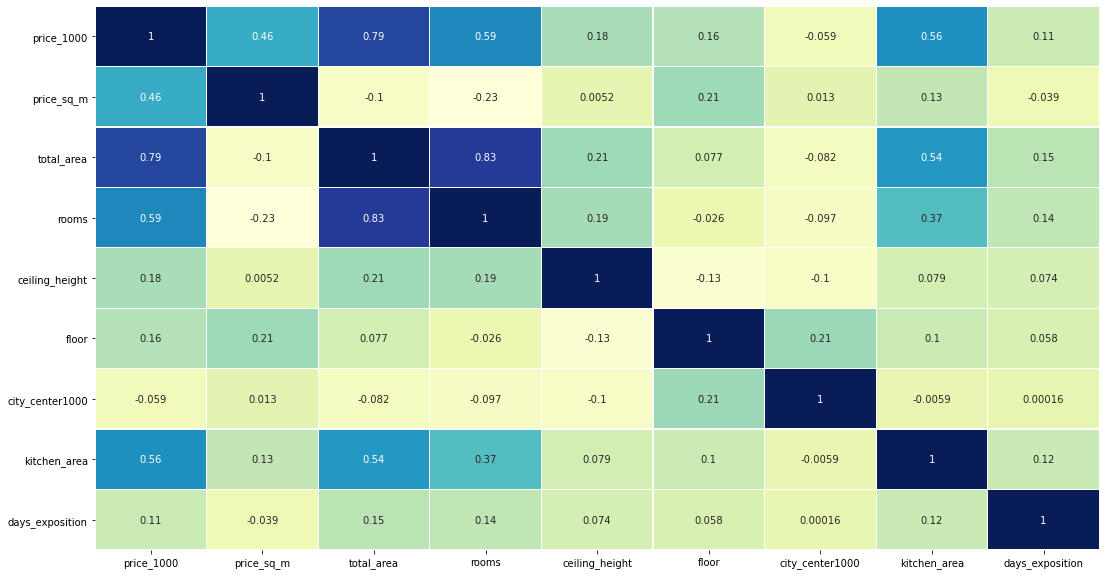

In [81]:
plt.figure(figsize=(18, 10))
sns.heatmap(spb_center[['price_1000', 'price_sq_m', 'total_area', 'rooms', 'ceiling_height',
         'floor', 'city_center1000', 'kitchen_area', 'days_exposition']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

Корреляция между общей площадью и ценой объекта высокая, что совершенно ожидаемо.

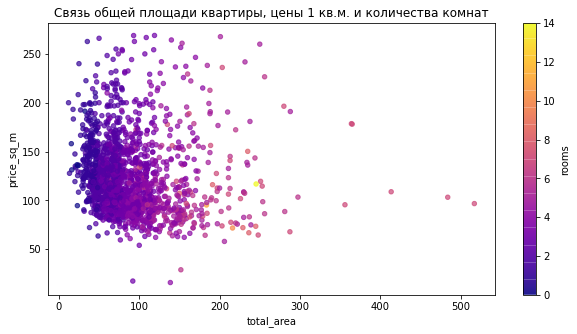

In [82]:
# построим график зависимости цены 1 кв. м. от общей площади 
spb_center.plot.scatter('total_area', 'price_sq_m', figsize=(10,5), alpha=0.7, c='rooms', colormap='plasma', sharex=False)
plt.title('Связь общей площади квартиры, цены 1 кв.м. и количества комнат')
plt.show()

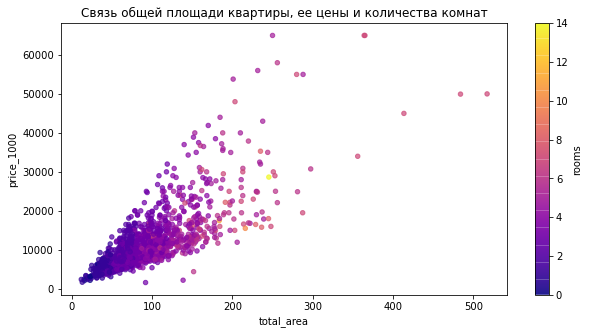

In [83]:
# построим график зависимости цены всей квартиры от общей площади 
spb_center.plot.scatter('total_area', 'price_1000', figsize=(10,5), alpha=0.7, c='rooms', colormap='plasma', sharex=False)
plt.title('Связь общей площади квартиры, ее цены и количества комнат')
plt.show()

In [84]:
display(spb_center.pivot_table(index='year_exposition', values='price_sq_m'))

price_sq_m
year_exposition            
2014                 132.59
2015                 116.61
2016                 117.27
2017                 123.10
2018                 126.42
2019                 132.20

В 2015 году цена снизилась, а после только росла - в отличие Ленобласти в целом, где спад был на год позже.

В отличие от Ленобласти в целом в центре Петербурга есть слабая корреляция расстояния до центра и высотности - действительно, в центре города меньше многоэтажных жилых домов.

### Выводы

Мы детально рассмотрели объекты в имеющемся датасете. 

Основная масса квартир имеет площадь до 116 квадратных метров при стоимости квадратного метра в среднем 100-160 тыс. Чаще всего на продажу уходит три месяца, хотя некоторым редким везунчикам хватает недели.

Дороже всего квартиры в Санкт-Петербургах и его поселках-спутниках: Мурино, Кудрово, Шушарах.

Как по центру Санкт-Петербурга, так и по всей Ленобласти, наблюдается только корреляция между общей ценой объекта и его площадью, и между площадью и количеством комнат, что вполне ожидаемо. Средняя - между общей ценой и ценой 1 кв. м, общей ценой и количеством комнат и относительной площадью кухни. А вот корреляции между расстоянием до центра и ценой практически нет. 

## Общий вывод

В ходе работы была проведена предобработка данных - устранены некоторые пропуски, некорректные значения. Оптимизированы названия населенных пунктов. Скорее всего, часть некорректных и пропущенных значений является ошибками ввода, часть - следствием невозможности обработать неполный адрес объекта. <br>

В дальнейшем при сборе данных стоит попытаться контролировать получаемые значения - ограничить высоту потолка правдоподобными 6 метрами, не пропускать общую этажность дома, площадь кухни, жилую площадь.

Из полученного датасета можно сделать вывод, что в центре Петербурга квартиры дороже, чем на окраине или в городах-спутниках. Студии и однушки по цене квадратного метра являются лидерами, но при этом продаются быстрее всего. К тому же и количество их предложений самое большое. 

Летом цены на квартиры несколько снижаются, а осенью и весной - растут. 

В целом по Ленобласти существует однозначная зависимость между площадью квартиры и ее стоимостью, и между площадью и количеством комнат, что вполне ожидаемо: чем больше площадь квартиры, тем в ней больше комнат и тем она дороже. Присутствует связь между общей ценой и ценой 1 кв. м, общей ценой и относительной площадью кухни. 

За рассматриваемый период средняя цена квадратного метра по всей Ленобласти снижалась в 2016 года, а по центру Санкт-Петербурга немного снижалась в 2015 году, потом только росла. 

Общие для Ленобласти зависимости справедливы и для Санкт-Петербурга, но можно к тому же заметить, что высотными являются спальные кварталы на краю города, а центр равномерно мало- и среднеэтажный.

Для более точной оценки рыночной стоимости квартиры, на мой взгляд, следует учитывать и такие факторы, как расстояние до метро, материал дома, год постройки, наличие лифта, в старом фонде - производился ли капитальный ремонт, электрическая или газовая плита, есть ли горячее водоснабжение или имеется газовая колонка. Стоимость квартиры при этом зависит от совокупности всех факторов не линейно - квартиры в доходных домах в центре ценятся за расположение, историческую и культурную ценность даже при необходимости огромных вложений в ремонт, а однушки в Мурино - за ликвидность и возможность получать доход от сдачи в аренду без особых затрат на ремонт. 